# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(
    "/content/drive/Othercomputers/My_MacBook_Air/MI_AL_Course/Course_3_Main_Program/Course_2_SQL_and_Statistics_Essentials/Module_6_EDA_Assignment_NYC_Taxi_Records_Analysis/trip_records"
)

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        _temp_df = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through unique hour of each day by taking only unique days and unique hours values
        for objDay in _temp_df["tpep_pickup_datetime"].dt.day.unique():

            # Iterate through unique hour of the selected date
            for objHour in _temp_df["tpep_pickup_datetime"].dt.hour.unique():

                hour_data = _temp_df[
                    (_temp_df["tpep_pickup_datetime"].dt.day == objDay)
                    & (_temp_df["tpep_pickup_datetime"].dt.hour == objHour)
                ]

                # Sample 5% of the hourly data randomly
                _temp_sampled_data = hour_data.sample(frac=0.05, random_state=42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, _temp_sampled_data])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        file_counter = file_counter + 1

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet(
    "/content/drive/Othercomputers/My_MacBook_Air/MI_AL_Course/Course_3_Main_Program/Course_2_SQL_and_Statistics_Essentials/Module_6_EDA_Assignment_NYC_Taxi_Records_Analysis/Sampled_Data/Sampled_Data.parquet"
)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file

df = pd.read_parquet(
    "/content/drive/Othercomputers/My_MacBook_Air/MI_AL_Course/Course_3_Main_Program/Course_2_SQL_and_Statistics_Essentials/Module_6_EDA_Assignment_NYC_Taxi_Records_Analysis/Sampled_Data/Sampled_Data.parquet"
)


In [ ]:
# df.head()

df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3703            2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
4166            2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
3847            2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
1882            2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
2995366         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3703              2.85         1.0                  N           263   
4166              1.32         1.0                  N            90   
3847              3.17         1.0                  N            79   
1882              3.80         1.0                  N           142   
2995366           7.97         NaN               None           140   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3703               41             1        15.60    1.0      0.5        4.12   
4166              137             1        12.80    1.0      0.5        3.56   
3847              141             1        14.90    1.0      0.5        3.98   
1882              107             2        24.70    1.0      0.5        0.00   
2995366            17             0        36.83    0.0      0.5        8.17   

         tolls_amount  improvement_surcharge  total_amount  \
3703              0.0                    1.0         24.72   
4166              0.0                    1.0         21.36   
3847              0.0                    1.0         23.88   
1882              0.0                    1.0         29.70   
2995366           0.0                    1.0         49.00   

         congestion_surcharge  airport_fee  Airport_fee  
3703                      2.5          0.0          NaN  
4166                      2.5          0.0          NaN  
3847                      2.5          0.0          NaN  
1882                      2.5          0.0          NaN  
2995366                   NaN          NaN          NaN

In [ ]:
# df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896420 entries, 3703 to 3036647
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace = True, drop = True)

df['store_and_fwd_flag'].value_counts()
df.drop(columns = ['store_and_fwd_flag'], inplace = True) # dropping this column as it contains mostly N values

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
airport_fee_med = df["Airport_fee"].median()

def select_valid_airport_fee(row):
    """
    Selects a valid airport fee from two columns, give priority to non-null and positive values.

    Args:
        row: A pandas Series representing a row from the DataFrame.

    Returns:
        The valid airport fee, or Airport fee median if neither column has a valid value.
    """
    if pd.notnull(row["airport_fee"]) and row["airport_fee"] > 0:
        return row["airport_fee"]
    elif pd.notnull(row["Airport_fee"]) and row["Airport_fee"] > 0:
        return row["Airport_fee"]
    else:
        return airport_fee_med

In [ ]:
# Combine the two airport fee columns

df['airport_fee'] = df.apply(select_valid_airport_fee, axis = 1)
df.drop('Airport_fee', axis = 1, inplace = True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
print(f" Total negative rows in fare_amount column: {df[df['fare_amount'] < 0].shape[0]}")

 Total negative rows in fare_amount column: 0


In [ ]:
# check where values of fare amount are negative

df[df['fare_amount'] < 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
print(df['RatecodeID'].isna().sum()) ## 64875 missing values
df['RatecodeID'].value_counts() ## RatecodeID 1 is the most common value

64875


RatecodeID
1.0     1729347
2.0       71584
99.0      10477
5.0       10293
3.0        6123
4.0        3718
6.0           3
Name: count, dtype: int64

In [ ]:
# Find which columns have negative values

print(f" Total negative rows in extra column: {df[df['extra'] < 0].shape[0]}")
print(f" Total negative rows in mta_tax column: {df[df['mta_tax'] < 0].shape[0]}")
print(f" Total negative rows in tip_amount column: {df[df['tip_amount'] < 0].shape[0]}")
print(f" Total negative rows in tolls_amount column: {df[df['tolls_amount'] < 0].shape[0]}")
print(f" Total negative rows in improvement_surcharge column: {df[df['improvement_surcharge'] < 0].shape[0]}")
print(f" Total negative rows in total_amount column: {df[df['total_amount'] < 0].shape[0]}")
print(f" Total negative rows in congestion_surcharge column: {df[df['congestion_surcharge'] < 0].shape[0]}")
print(f" Total negative rows in airport_fee column: {df[df['airport_fee'] < 0].shape[0]}")

 Total negative rows in extra column: 3
 Total negative rows in mta_tax column: 75
 Total negative rows in tip_amount column: 0
 Total negative rows in tolls_amount column: 0
 Total negative rows in improvement_surcharge column: 80
 Total negative rows in total_amount column: 80
 Total negative rows in congestion_surcharge column: 57
 Total negative rows in airport_fee column: 0


In [ ]:
# fix these negative values

df = df[
    ~(
        (df["extra"] < 0)
        | (df["mta_tax"] < 0)
        | (df["improvement_surcharge"] < 0)
        | (df["total_amount"] < 0)
        | (df["congestion_surcharge"] < 0)
    )
]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
# proportion = missing_values / total_rows * 100

df.isnull().sum()/len(df) * 100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.421066
trip_distance            0.000000
RatecodeID               3.421066
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.421066
airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values


df[df['passenger_count'].isnull()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   
6               2  2023-01-01 00:39:50   2023-01-01 00:54:29              NaN   
8               2  2023-01-01 00:43:47   2023-01-01 00:56:12              NaN   
17              2  2023-01-01 00:33:00   2023-01-01 01:01:00              NaN   
26              2  2023-01-01 00:33:00   2023-01-01 00:57:00              NaN   
...           ...                  ...                   ...              ...   
1896193         2  2023-12-29 20:33:43   2023-12-29 20:50:06              NaN   
1896246         2  2023-12-29 21:18:26   2023-12-29 21:37:17              NaN   
1896293         1  2023-12-29 21:58:55   2023-12-29 22:09:37              NaN   
1896381         2  2023-12-29 21:35:20   2023-12-29 21:50:44              NaN   
1896394         1  2023-12-29 21:28:06   2023-12-29 22:01:31              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4                 7.97         NaN           140            17             0   
6                 7.53         NaN           213             7             0   
8                 5.36         NaN            88           229             0   
17                6.90         NaN            45           188             0   
26                5.11         NaN           255           229             0   
...                ...         ...           ...           ...           ...   
1896193           2.60         NaN           161           114             0   
1896246           5.70         NaN           161            88             0   
1896293           1.70         NaN           239           141             0   
1896381           2.00         NaN           137           211             0   
1896394          10.00         NaN           249           169             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4              36.83    0.0      0.5        8.17          0.00   
6              30.97    0.0      0.5        4.00          6.55   
8              24.51    0.0      0.5        4.28          0.00   
17             33.49    0.0      0.5        2.00          0.00   
26             24.04    0.0      0.5        5.61          0.00   
...              ...    ...      ...         ...           ...   
1896193        18.97    0.0      0.5        0.00          0.00   
1896246        33.69    0.0      0.5        7.54          0.00   
1896293        12.10    1.0      0.5        1.71          0.00   
1896381        14.87    0.0      0.5        2.83          0.00   
1896394        48.48    0.0      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
4                          1.0         49.00                   NaN   
6                          1.0         43.02                   NaN   
8                          1.0         32.79                   NaN   
17                         1.0         39.49                   NaN   
26                         1.0         33.65                   NaN   
...                        ...           ...                   ...   
1896193                    1.0         22.97                   NaN   
1896246                    1.0         45.23                   NaN   
1896293                    1.0         18.81                   NaN   
1896381                    1.0         21.70                   NaN   
1896394                    1.0         52.48                   NaN   

         airport_fee  
4                0.0  
6                0.0  
8                0.0  
17               0.0  
26               0.0  
...              ...  
1896193          0.0  
1896246          0.0  
1896293          0.0  
1896381          0.0  
1896394          0.0  

[64875 rows x 18 columns]

In [ ]:
# Impute NaN values in 'passenger_count'

df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

Did you find zeroes in passenger_count? Handle these.

In [ ]:
df[df['passenger_count'] == 0].shape

(29683, 18)

In [ ]:
passenger_count_median = df["passenger_count"].median()

df["passenger_count"] = df['passenger_count'].apply(lambda x: passenger_count_median if x <= 0 else x) ## 0 passenger count is not possible, so we will replace it with median value
df[df['passenger_count'] == 0].shape # check if the 0 values are imputed

(0, 18)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
print(f"RatecodeID Null Sum: {df['RatecodeID'].isnull().sum()}")

RatecodeID Null Sum: 64875


In [ ]:
# Fix missing values in 'RatecodeID'

RatecodeID_median = df["RatecodeID"].median()
df["RatecodeID"]=df["RatecodeID"].fillna(RatecodeID_median) # Impute NaN values in 'RatecodeID' with median

print(f"RatecodeID Null Sum: {df['RatecodeID'].isnull().sum()}")
print("RatecodeID Value Counts: ")
print(df["RatecodeID"].value_counts())

RatecodeID Null Sum: 0
RatecodeID Value Counts: 
RatecodeID
1.0     1794169
2.0       71561
99.0      10477
5.0       10290
3.0        6122
4.0        3717
6.0           3
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
print("------------------ Value Counts Before Imputation --------------------------------")

print(df["congestion_surcharge"].value_counts())
congestion_surcharge_median = df["congestion_surcharge"].median()

df["congestion_surcharge"] = df["congestion_surcharge"].fillna(congestion_surcharge_median) # Impute NaN values in 'congestion_surcharge' with median

print("------------------ Value Counts After Imputation --------------------------------")
print('Missing value in congestion_surcharge: ', df['congestion_surcharge'].isnull().sum())

print('congestion_surcharge value_counts ')
print(df["congestion_surcharge"].value_counts())

------------------ Value Counts Before Imputation --------------------------------
congestion_surcharge
2.5    1690621
0.0     140842
0.5          1
Name: count, dtype: int64
------------------ Value Counts After Imputation --------------------------------
Missing value in congestion_surcharge:  0
congestion_surcharge value_counts 
congestion_surcharge
2.5    1755496
0.0     140842
0.5          1
Name: count, dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
print("------------------ Before Action --------------------------------")
print(df.isna().sum()/len(df))

df.dropna(inplace = True)

print("------------------ After Action --------------------------------")
print(df.isna().sum()/len(df))

------------------ Before Action --------------------------------
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64
------------------ After Action --------------------------------
VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax      

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896339e+06                     1896339                     1896339   
mean   1.733088e+00  2023-07-02 19:31:53.163020  2023-07-02 19:49:18.871293   
min    1.000000e+00         2001-01-01 00:06:49         2001-01-01 15:42:11   
25%    1.000000e+00  2023-04-02 16:08:42.500000         2023-04-02 16:27:08   
50%    2.000000e+00         2023-06-27 15:42:18         2023-06-27 15:59:01   
75%    2.000000e+00  2023-10-06 19:35:55.500000  2023-10-06 19:51:59.500000   
max    6.000000e+00         2024-01-01 00:01:34         2024-01-01 20:50:55   
std    4.475841e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896339e+06   1.896339e+06  1.896339e+06  1.896339e+06   
mean      1.372177e+00   3.843700e+00  1.613222e+00  1.652696e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.644413e-01   1.271909e+02  7.269103e+00  6.400076e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896339e+06  1.896339e+06  1.896339e+06  1.896339e+06  1.896339e+06   
mean   1.640441e+02  1.163778e+00  1.991727e+01  1.588171e+00  4.953180e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980101e+01  5.080874e-01  1.055388e+02  1.829280e+00  4.846019e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896339e+06  1.896339e+06           1.896339e+06  1.896339e+06   
mean   3.547129e+00  5.964458e-01           9.990543e-01  2.898046e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.056790e+00  2.187060e+00           2.833469e-02  1.064181e+02   

       congestion_surcharge   airport_fee  
count          1.896339e+06  1.896339e+06  
mean           2.314323e+00  1.380311e-01  
min            0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.555279e-01  4.575895e-01

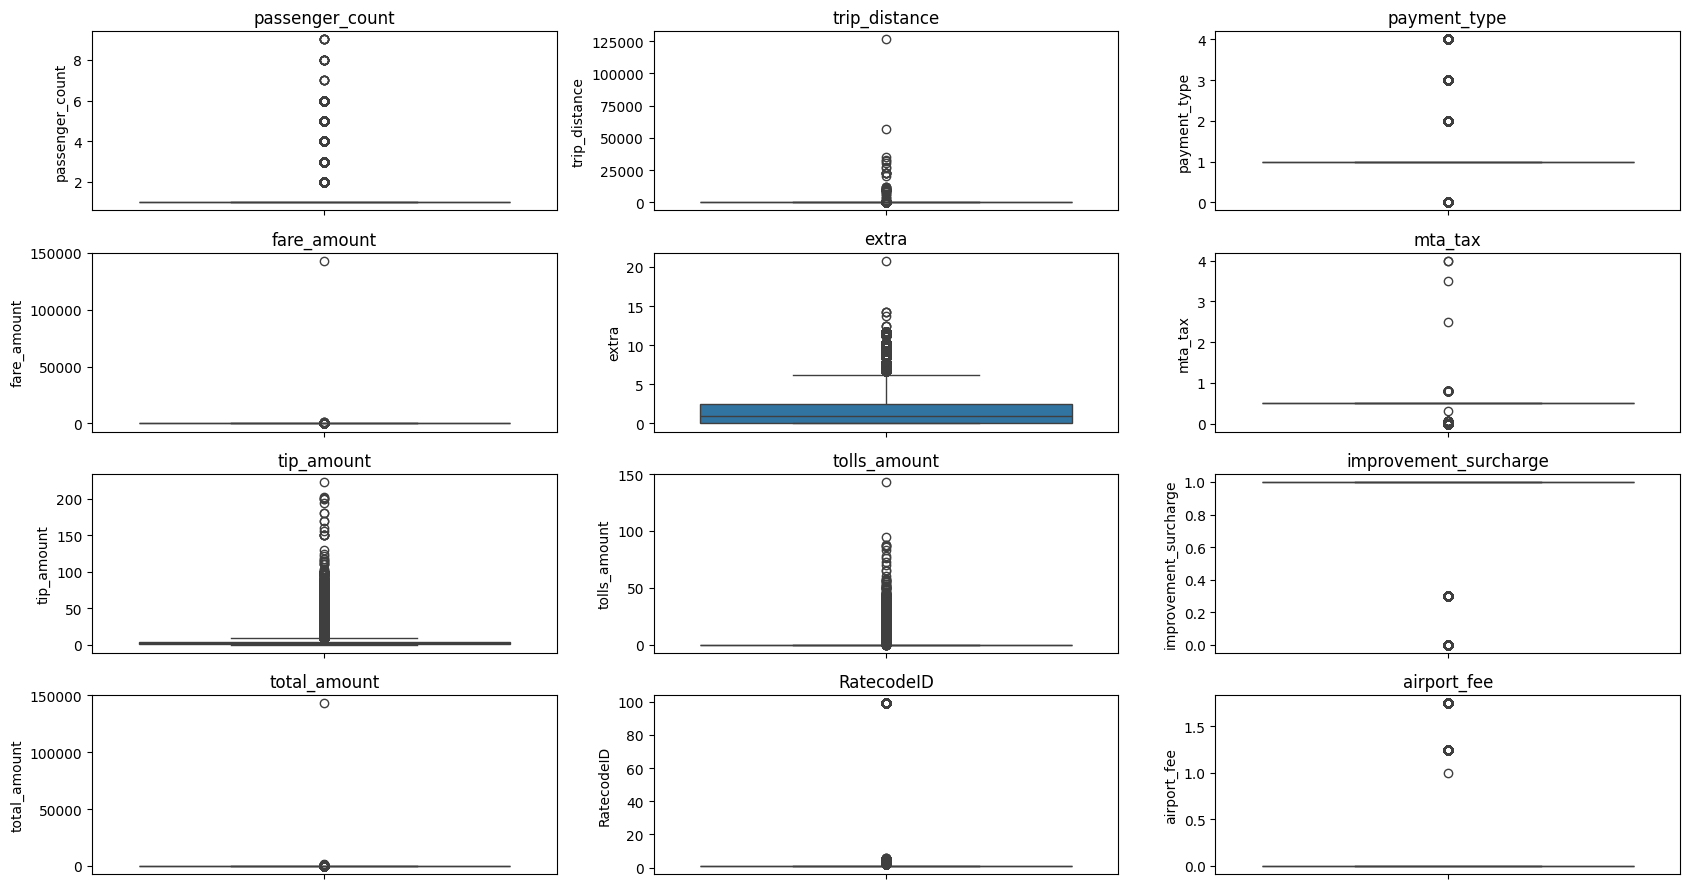

In [ ]:
numerical_cols = [
    "passenger_count",
    "trip_distance",
    "payment_type",
    "fare_amount",
    "extra",
    "mta_tax",
    "tip_amount",
    "tolls_amount",
    "improvement_surcharge",
    "total_amount",
    "RatecodeID",
    "airport_fee",
]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(17, 9))

col_counter = 0

for row in range(0, 4):
    for col in range(0, 3):
        ax = axes[row, col]
        sns.boxplot(data=df[numerical_cols[col_counter]], ax=ax)
        ax.set_title(numerical_cols[col_counter])
        col_counter = col_counter + 1

plt.tight_layout()
plt.show()

################################################ Outlier Analysis ################################################
#
# (1) passenger_count: There are few trips where passenger count is > 6, those can be considered as outliers.
# (2) trip_distance: trip distance after 300 to 400 can be considered as outliers.
# (3) fare_amount: certainly fare amount has some entries that can be considered as outliers.
# (4) mta_tax: This column also has some outliers.
# (5) RatecodeID, tolls_amount and total_amount also have outliers.
#
################################################ Outlier Analysis ################################################


In [ ]:
df['tip_amount'].describe()

count    1.820729e+06
mean     3.593014e+00
std      4.064171e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.860000e+00
75%      4.480000e+00
max      2.230800e+02
Name: tip_amount, dtype: float64

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

In [ ]:
# Deleted entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df["fare_amount"] > 300) & (df['trip_distance'] == 0))]

In [ ]:
# Deleted entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df = df[~((df["fare_amount"] == 0) & (df['trip_distance'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [ ]:
# Entries where trip_distance is more than 250 miles.
df = df[~(df['trip_distance'] > 250)]

In [ ]:
# Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
print(df[(df['payment_type'] == 0)].shape)
df = df[~(df['payment_type'] == 0)]
print(df[(df['payment_type'] == 0)].shape)

(64845, 18)
(0, 18)


In [ ]:
# Deleted the entries where fare_amount is greater than 300.
df = df[~(df["fare_amount"] > 300)]

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[~(df["passenger_count"] > 7)]

In [ ]:
# Continue with outlier handling
df = df[~(df['trip_distance'] > 99)]

In [ ]:
# Do any columns need standardising? Yes, mta_tax and RatecodeID

df = df[~(df['mta_tax'] > 2)]
df = df[~(df['mta_tax'] == -0.50)]
df = df[~(df['RatecodeID'] == 99)]

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical? > Numerical.



* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

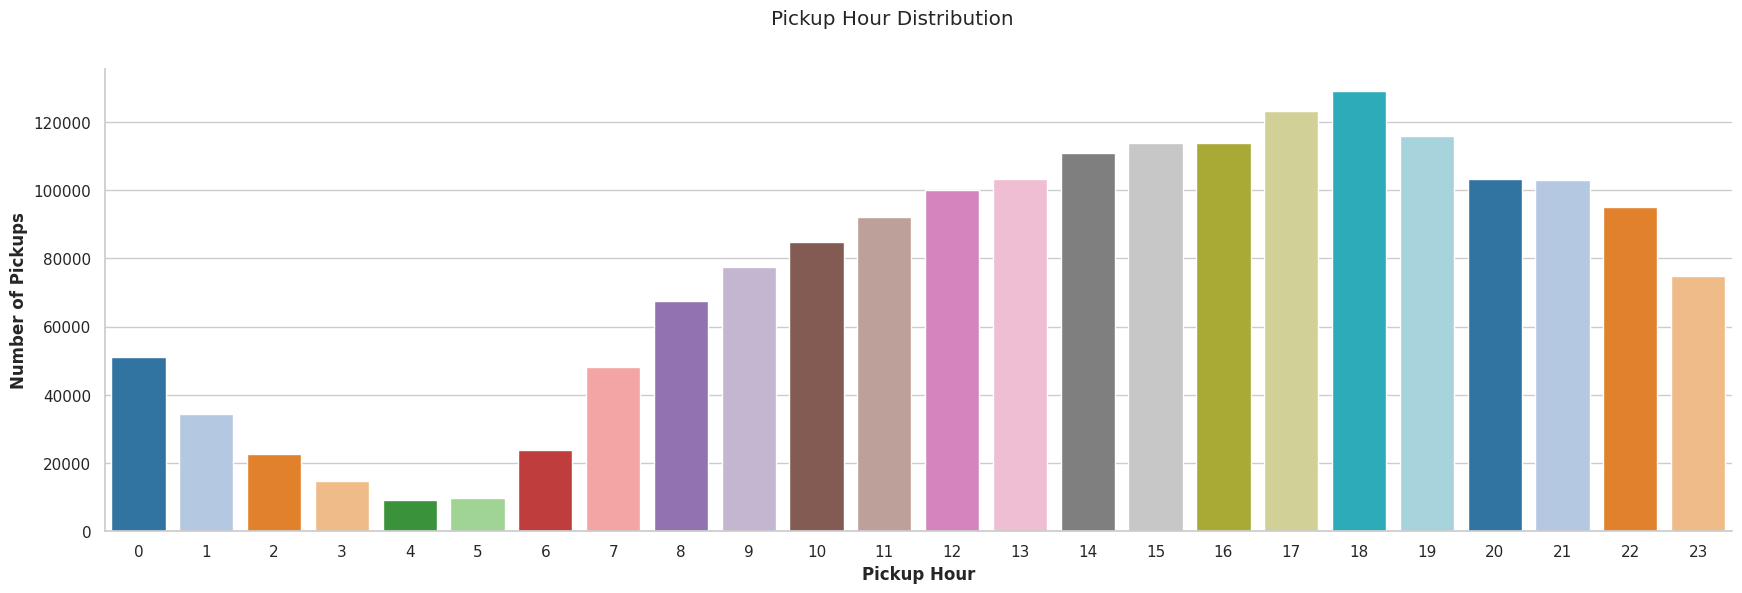

In [ ]:
# Find and show the hourly trends in taxi pickups

plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
palette = sns.color_palette("tab20")

ax = sns.countplot(
    x=df["tpep_pickup_datetime"].dt.hour,
    palette=palette
)

ax.set_xlabel("Pickup Hour", fontdict={"fontweight": "bold", "fontsize": 12})
ax.set_ylabel("Number of Pickups", fontdict={"fontweight": "bold", "fontsize": 12})
plt.suptitle("Pickup Hour Distribution", fontdict={"fontweight": "bold", "fontsize": 16})
plt.show()


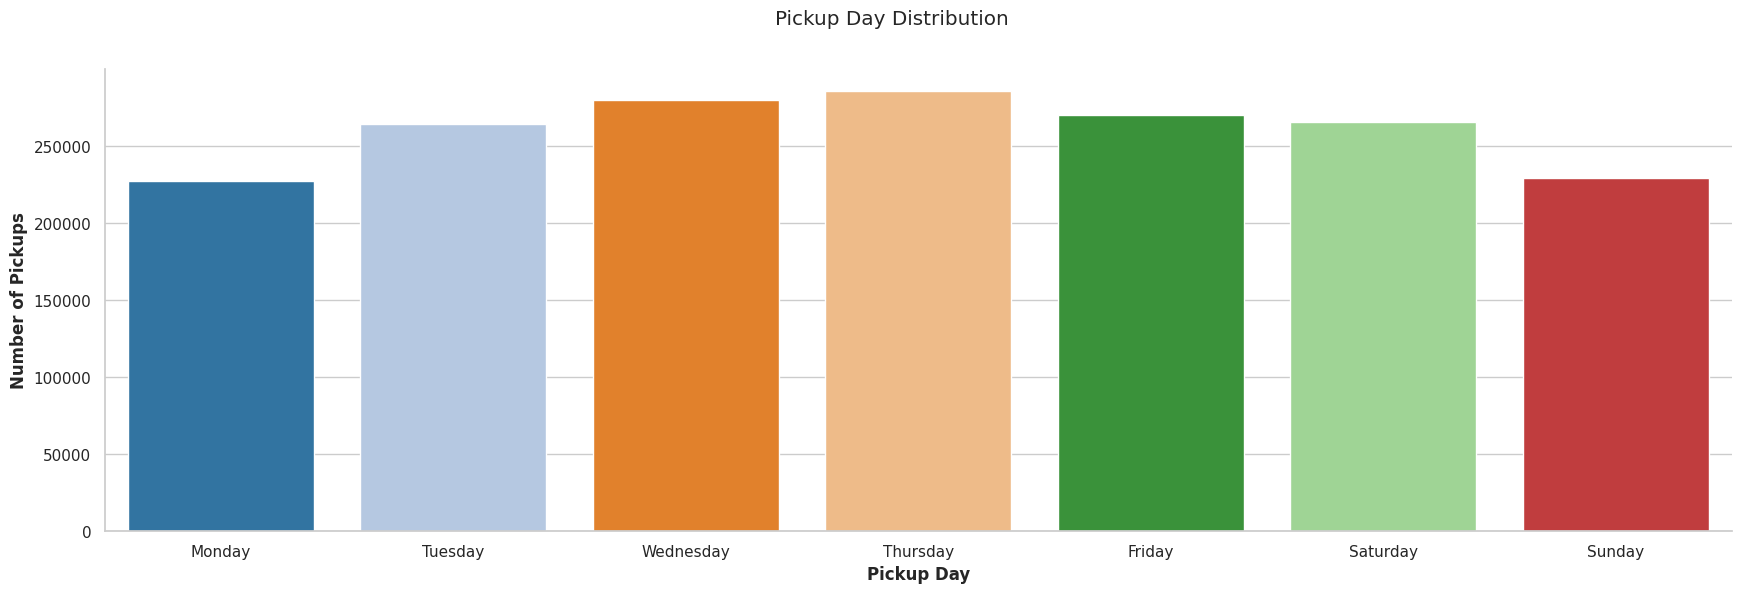

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
palette = sns.color_palette("tab20")
_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.countplot(
    x=df["tpep_pickup_datetime"].dt.day_name(),
    palette=palette,
    order=_order
)

ax.set_xlabel("Pickup Day", fontdict={'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Number of Pickups", fontdict={'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Pickup Day Distribution", fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.show()

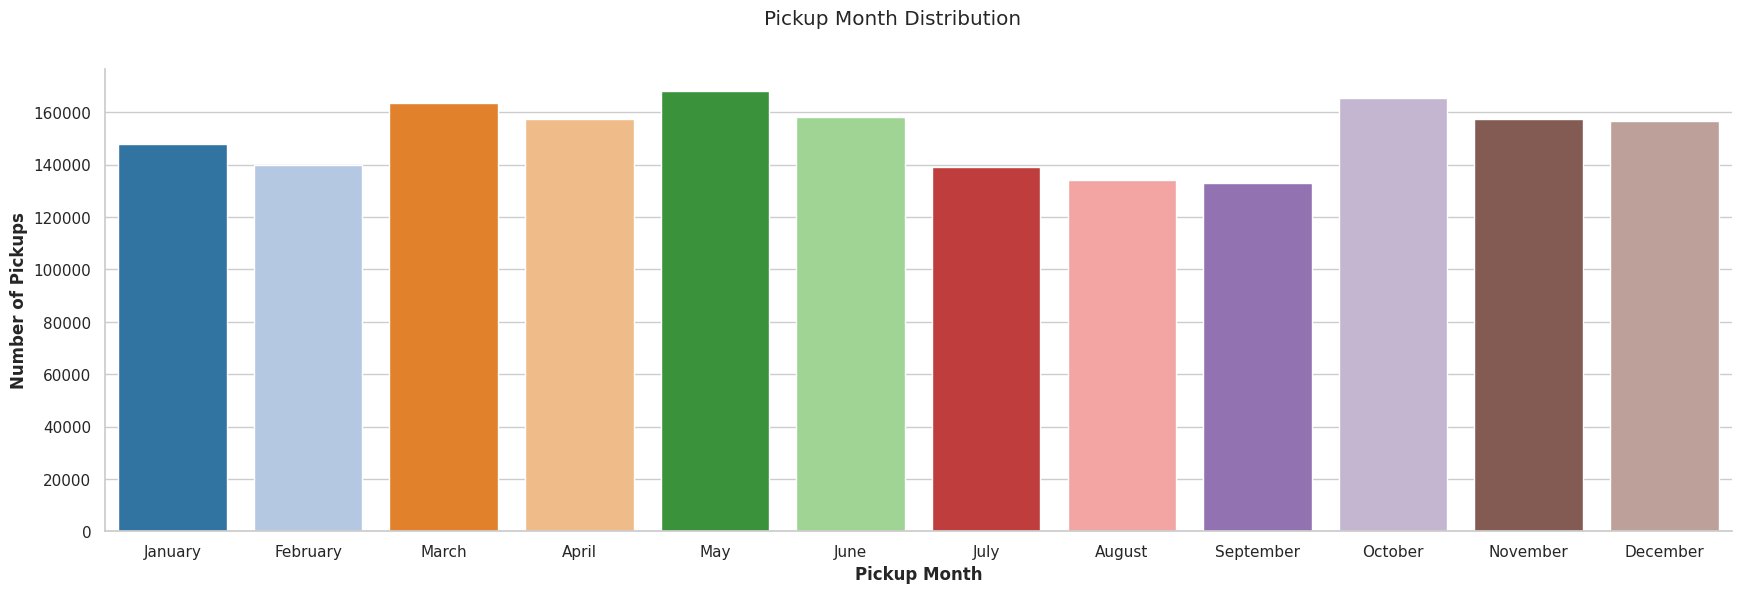

In [ ]:
# Show the monthly trends in pickups

plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
palette = sns.color_palette("tab20")
_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

ax = sns.countplot(
    x=df["tpep_pickup_datetime"].dt.month_name(),
    palette=palette,
    order=_order
)

ax.set_xlabel("Pickup Month", fontdict={'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Number of Pickups", fontdict={'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Pickup Month Distribution", fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

#Do these contain zero/negative values?
#Answer: Yes, all these columns either contains negative values or zero values.

df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].min()

fare_amount      0.0
tip_amount       0.0
total_amount     0.0
trip_distance    0.0
dtype: float64

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
# Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?
# Answer: Yes.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

df_valid_trip_data = df[
    (df['fare_amount'] > 0) &
    (df['tip_amount'] > 0) &
    (df['trip_distance'] > 0)
]

In [ ]:
print(df_valid_trip_data[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe())
print()
print(df_valid_trip_data[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].min())

        fare_amount    tip_amount  total_amount  trip_distance
count  1.412861e+06  1.412861e+06  1.412861e+06   1.412861e+06
mean   1.934034e+01  4.580473e+00  2.956017e+01   3.417247e+00
std    1.700697e+01  3.979769e+00  2.248876e+01   4.368859e+00
min    1.000000e-02  1.000000e-02  4.510000e+00   1.000000e-02
25%    9.300000e+00  2.380000e+00  1.680000e+01   1.100000e+00
50%    1.350000e+01  3.400000e+00  2.184000e+01   1.810000e+00
75%    2.120000e+01  5.000000e+00  3.110000e+01   3.340000e+00
max    3.000000e+02  2.230800e+02  4.218800e+02   8.924000e+01

fare_amount      0.01
tip_amount       0.01
total_amount     4.51
trip_distance    0.01
dtype: float64


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

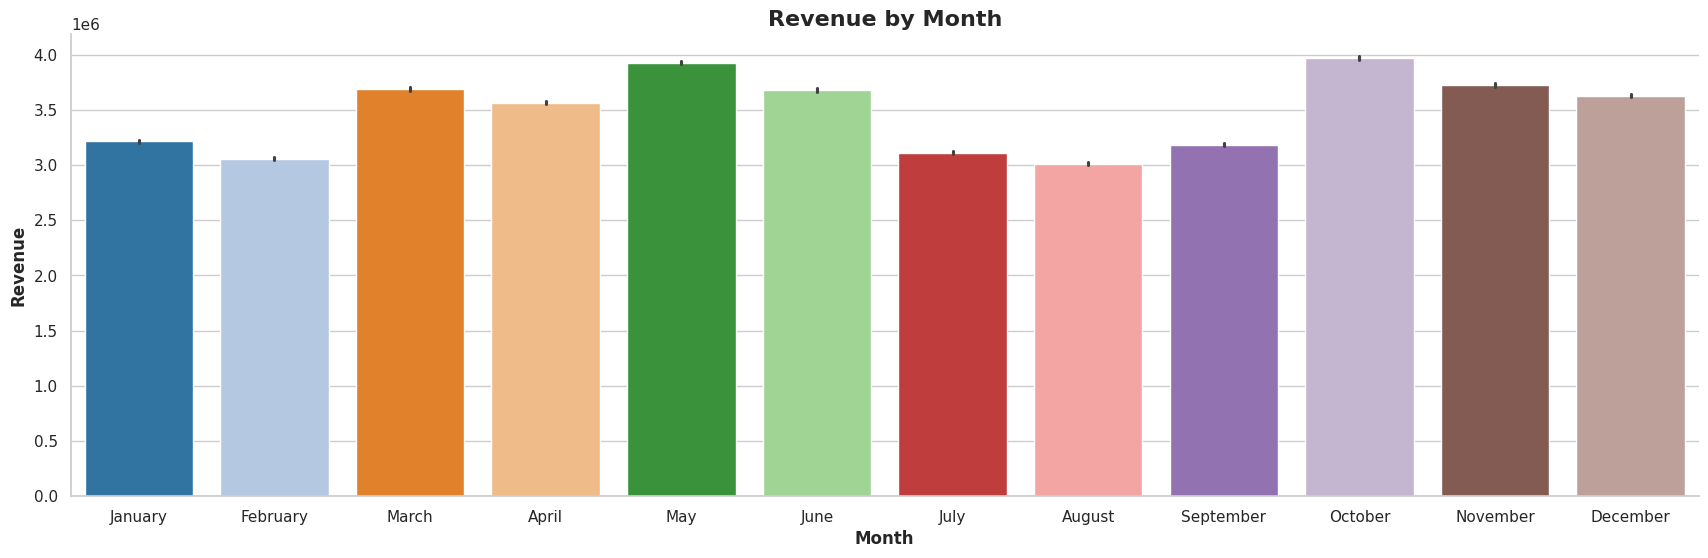

In [ ]:
# Group data by month and analyse monthly revenue

plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc = custom_params)
palette = sns.color_palette("tab20")
_order = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

ax = sns.barplot(
    x = df_valid_trip_data["tpep_pickup_datetime"].dt.month_name(),
    y = df_valid_trip_data['total_amount'],
    palette = palette,
    order = _order,
    estimator = np.sum
)

ax.set_xlabel("Month", fontdict = {'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Revenue", fontdict = {'fontweight': 'bold', 'fontsize': 12})
plt.title("Revenue by Month", fontdict = {'fontweight': 'bold', 'fontsize': 16})
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

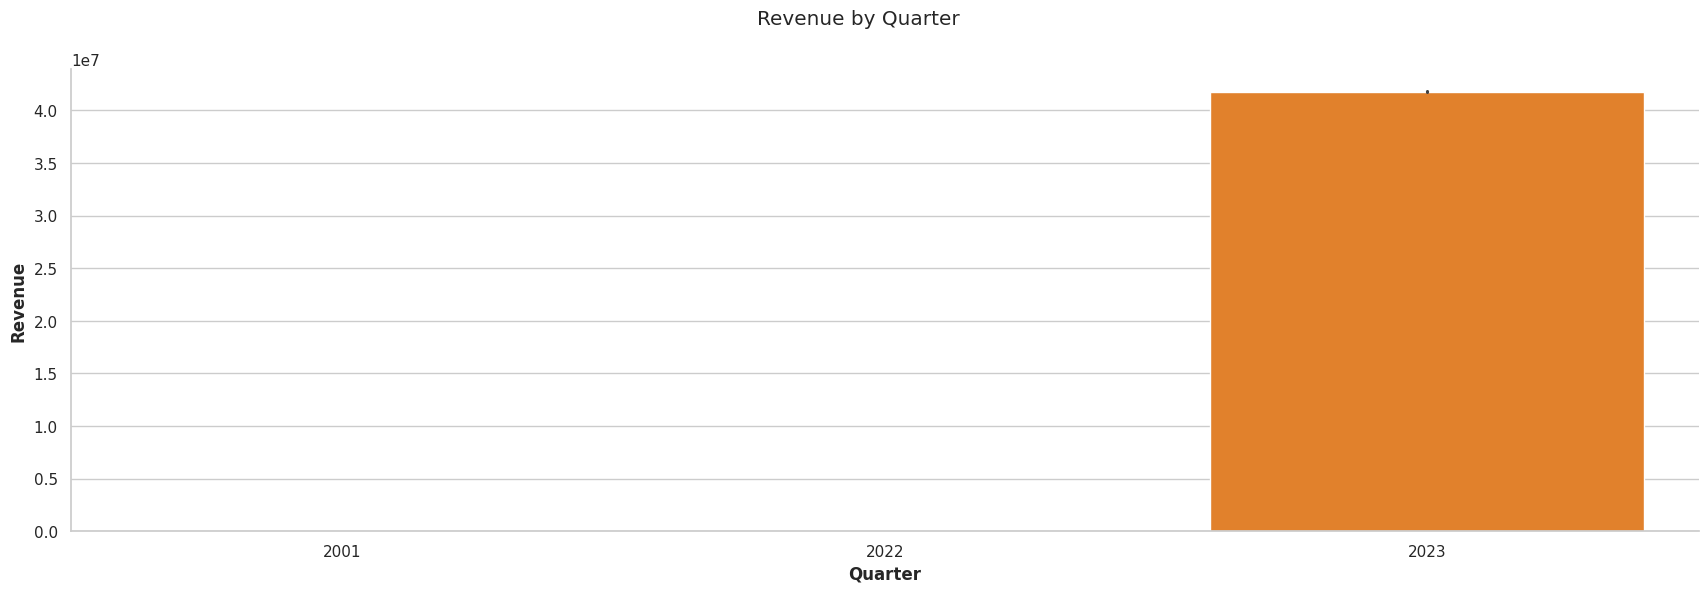

In [ ]:
# Calculate proportion of each year

plt.figure(figsize=(20, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc = custom_params)
palette = sns.color_palette("tab20")

ax = sns.barplot(
    x = df_valid_trip_data["tpep_pickup_datetime"].dt.year,
    y = df_valid_trip_data['total_amount'],
    palette = palette,
    estimator = np.sum
)

ax.set_xlabel("Quarter", fontdict = {'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Revenue", fontdict = {'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Revenue by Quarter", fontdict = {'fontweight': 'bold', 'fontsize': 16})
plt.show()

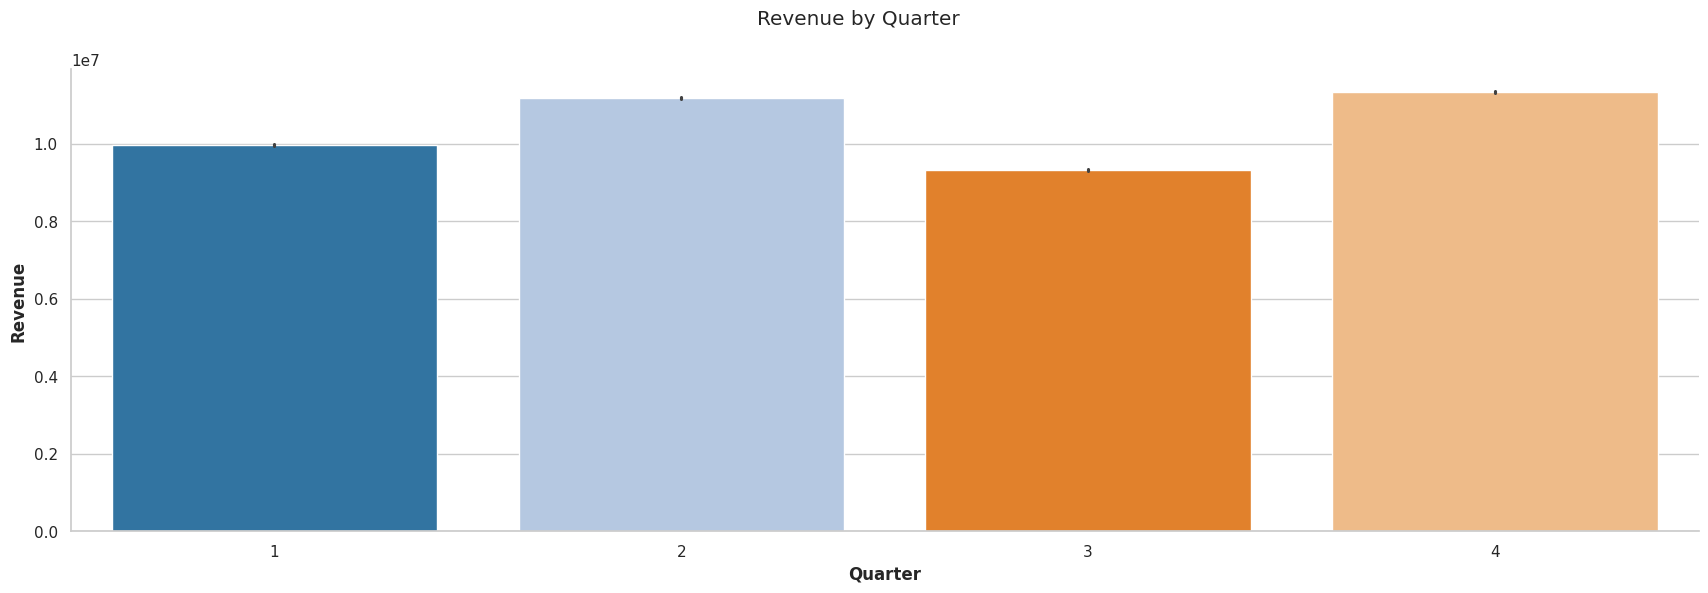

In [ ]:
# Calculate proportion of each quarter

plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc = custom_params)
palette = sns.color_palette("tab20")

ax = sns.barplot(
    x = df_valid_trip_data["tpep_pickup_datetime"].dt.quarter,
    y = df_valid_trip_data['total_amount'],
    palette = palette,
    estimator = np.sum
)

ax.set_xlabel("Quarter", fontdict = {'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Revenue", fontdict = {'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Revenue by Quarter", fontdict = {'fontweight': 'bold', 'fontsize': 16})
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
df_valid_trip_data['trip_distance'].describe()

count    1.412861e+06
mean     3.417247e+00
std      4.368859e+00
min      1.000000e-02
25%      1.100000e+00
50%      1.810000e+00
75%      3.340000e+00
max      8.924000e+01
Name: trip_distance, dtype: float64

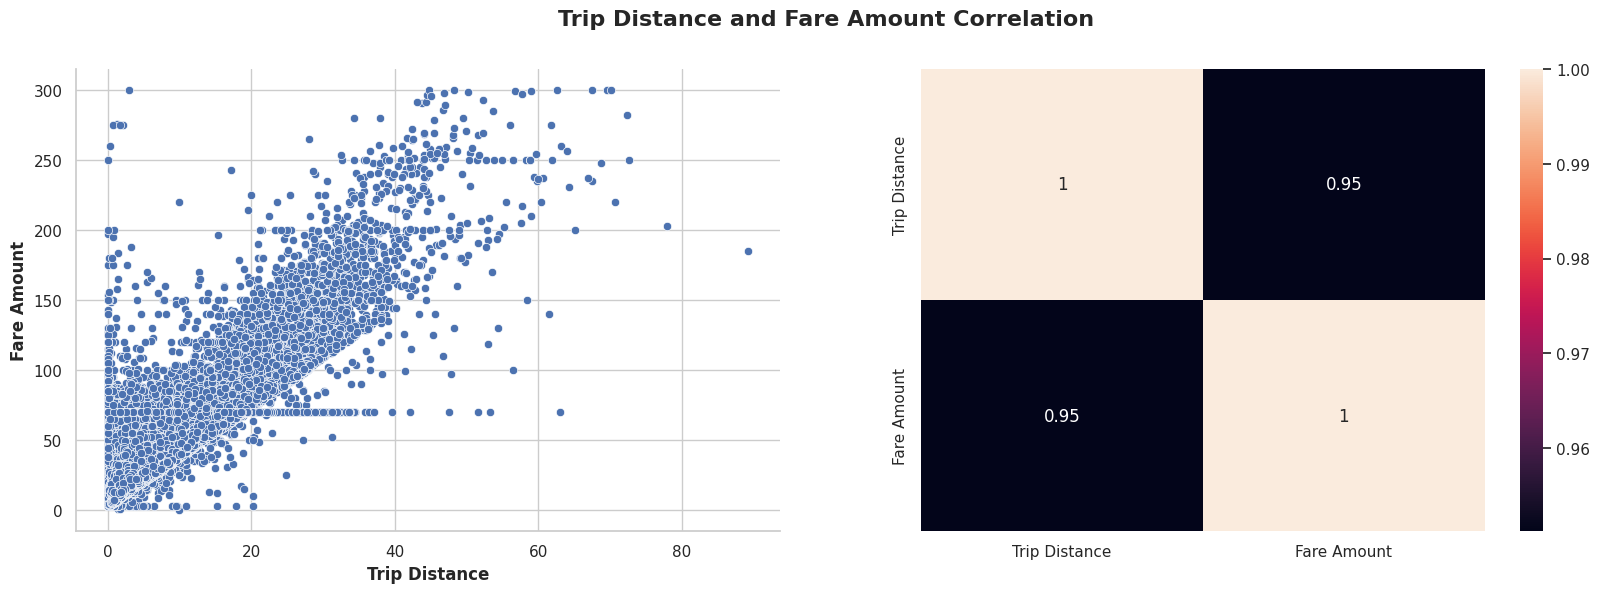

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
fig.suptitle("Trip Distance and Fare Amount Correlation", fontweight="bold", fontsize=16)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
palette = sns.color_palette("tab20")

# Scatter plot
ax1 = sns.scatterplot(
    x=df_valid_trip_data["trip_distance"],
    y=df_valid_trip_data['fare_amount'],
    palette=palette,
    ax=axes[0]
)
ax1.set_xlabel("Trip Distance", fontdict={'fontweight': 'bold', 'fontsize': 12})
ax1.set_ylabel("Fare Amount", fontdict={'fontweight': 'bold', 'fontsize': 12})

# Heatmap
ax2 = sns.heatmap(
    df_valid_trip_data[["trip_distance", "fare_amount"]].corr(),
    annot=True,
    ax=axes[1]
)
ax2.set_xticklabels(['Trip Distance', 'Fare Amount'])
ax2.set_yticklabels(['Trip Distance', 'Fare Amount'])

plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Minutes
df_valid_trip_data["trip_duration_in_minutes"] = (
    df_valid_trip_data['tpep_dropoff_datetime'] -
    df_valid_trip_data['tpep_pickup_datetime']
).dt.total_seconds() / 60


# Hours
df_valid_trip_data["trip_duration_in_hours"] = (
    df_valid_trip_data['tpep_dropoff_datetime'] -
    df_valid_trip_data['tpep_pickup_datetime']
).dt.total_seconds() / 3600

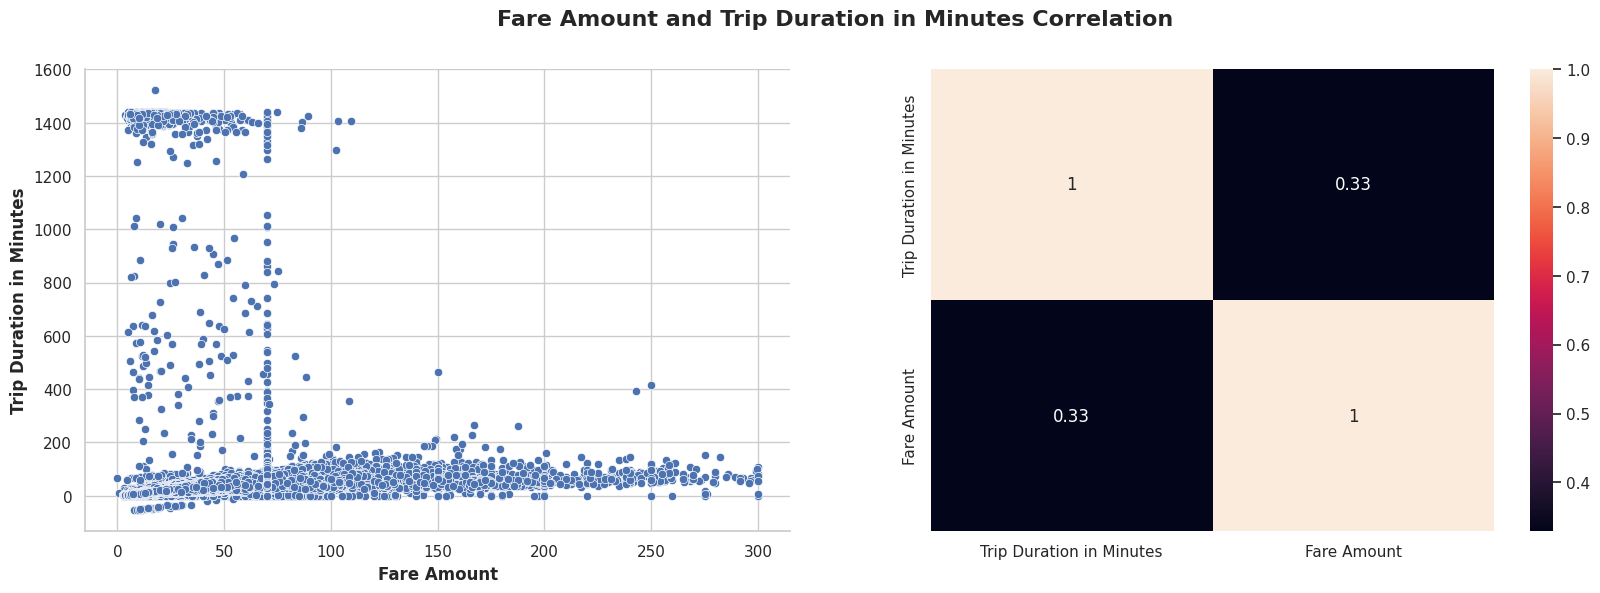

In [ ]:
# fare_amount and trip duration (pickup time to dropoff time) in Minutes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
fig.suptitle("Fare Amount and Trip Duration in Minutes Correlation", fontweight="bold", fontsize=16)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
palette = sns.color_palette("tab20")


# Scatter plot
ax1 = sns.scatterplot(
    x=df_valid_trip_data['fare_amount'],
    y=df_valid_trip_data['trip_duration_in_minutes'],
    palette=palette,
    ax=axes[0]
)
ax1.set_xlabel("Fare Amount", fontdict={'fontweight': 'bold', 'fontsize': 12})
ax1.set_ylabel("Trip Duration in Minutes", fontdict={'fontweight': 'bold', 'fontsize': 12})


# Heatmap
ax2 = sns.heatmap(
    df_valid_trip_data[["trip_duration_in_minutes", "fare_amount"]].corr(),
    annot=True,
    ax=axes[1]
)
ax2.set_xticklabels(['Trip Duration in Minutes', 'Fare Amount'])
ax2.set_yticklabels(['Trip Duration in Minutes', 'Fare Amount'])

plt.show()

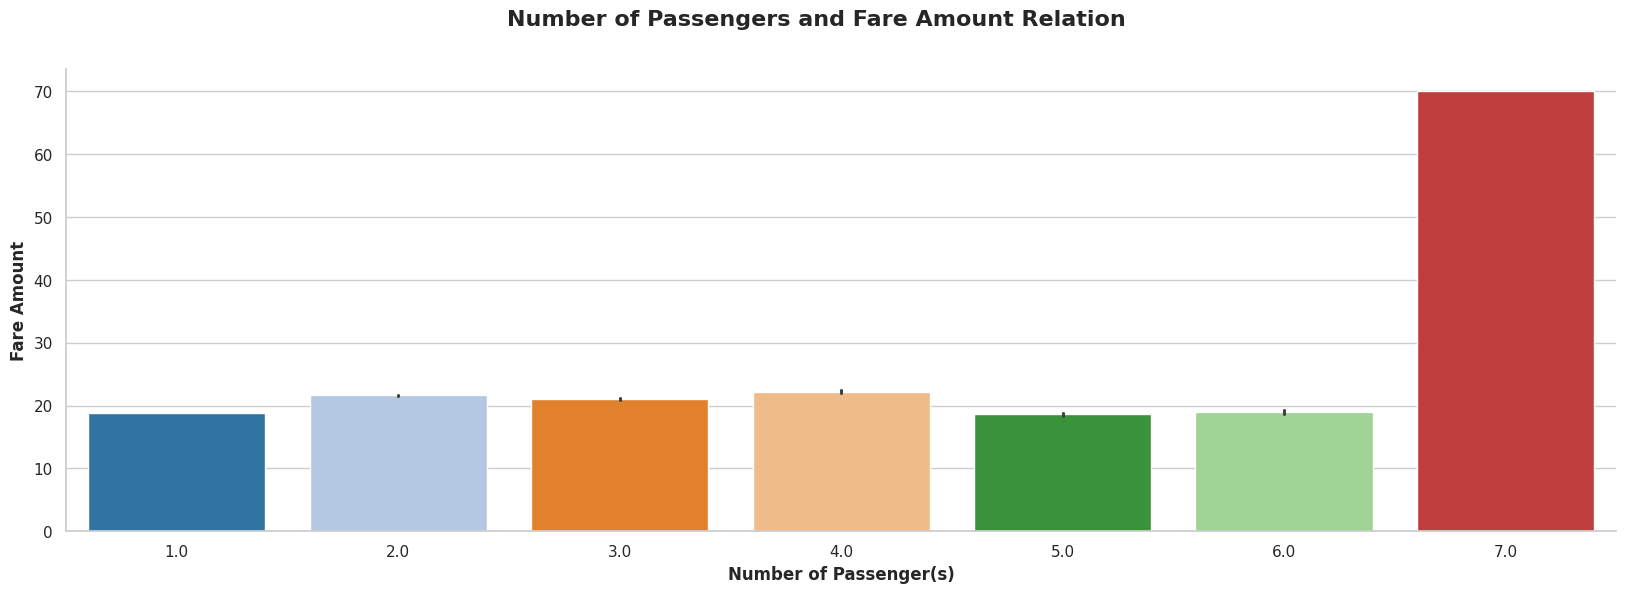

In [ ]:
# Show relationship between fare and number of passengers

fig, axes = plt.subplots(figsize=(20, 6))
fig.suptitle("Number of Passengers and Fare Amount Relation", fontweight="bold", fontsize=16)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
palette = sns.color_palette("tab20")

# Scatter plot
ax1 = sns.barplot(
    x=df_valid_trip_data['passenger_count'],
    y=df_valid_trip_data['fare_amount'],
    palette=palette
)
ax1.set_xlabel("Number of Passenger(s)", fontdict={'fontweight': 'bold', 'fontsize': 12})
ax1.set_ylabel("Fare Amount", fontdict={'fontweight': 'bold', 'fontsize': 12})

plt.show()

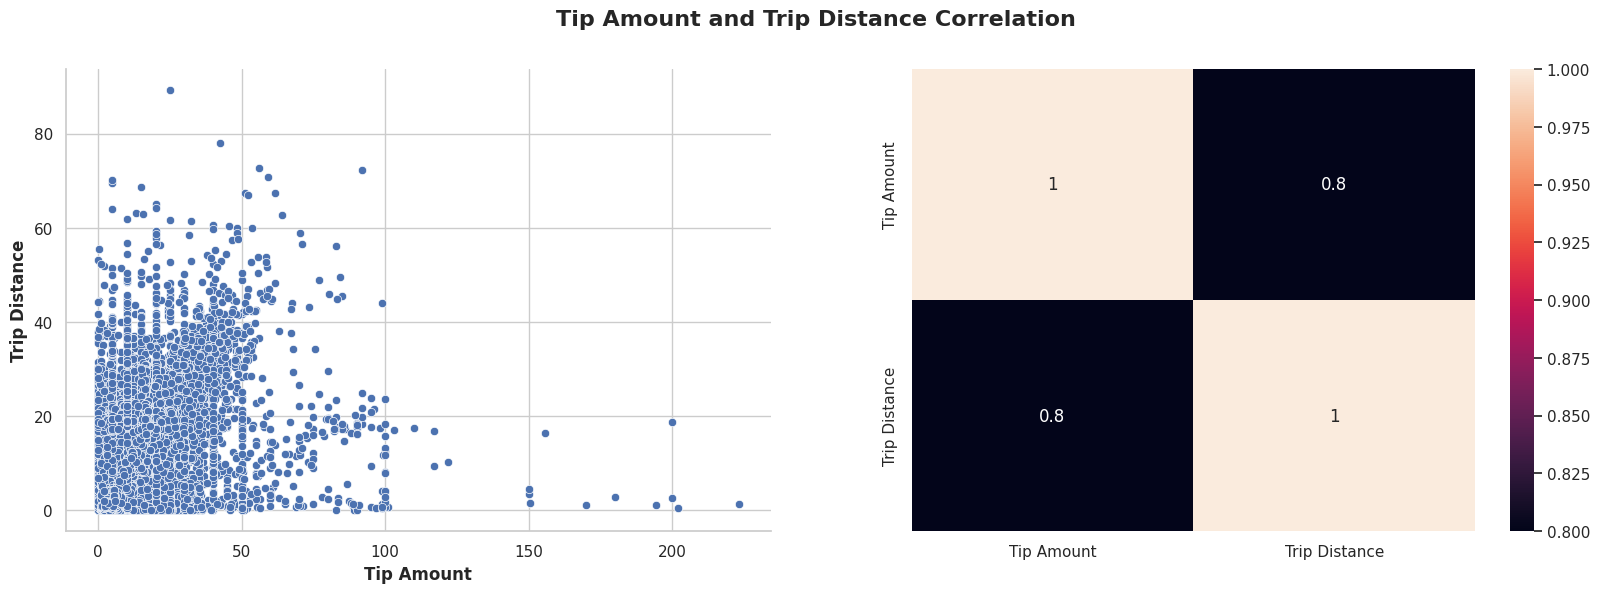

In [ ]:
# Show relationship between tip and trip distance

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
fig.suptitle("Tip Amount and Trip Distance Correlation", fontweight="bold", fontsize=16)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
palette = sns.color_palette("tab20")


# Scatter plot
ax1 = sns.scatterplot(
    x=df_valid_trip_data['tip_amount'],
    y=df_valid_trip_data['trip_distance'],
    palette=palette,
    ax=axes[0]
)
ax1.set_xlabel("Tip Amount", fontdict={'fontweight': 'bold', 'fontsize': 12})
ax1.set_ylabel("Trip Distance", fontdict={'fontweight': 'bold', 'fontsize': 12})


# Heatmap
ax2 = sns.heatmap(
    df_valid_trip_data[["tip_amount", "trip_distance"]].corr(),
    annot=True,
    ax=axes[1]
)
ax2.set_xticklabels(['Tip Amount', 'Trip Distance'])
ax2.set_yticklabels(['Tip Amount', 'Trip Distance'])

plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

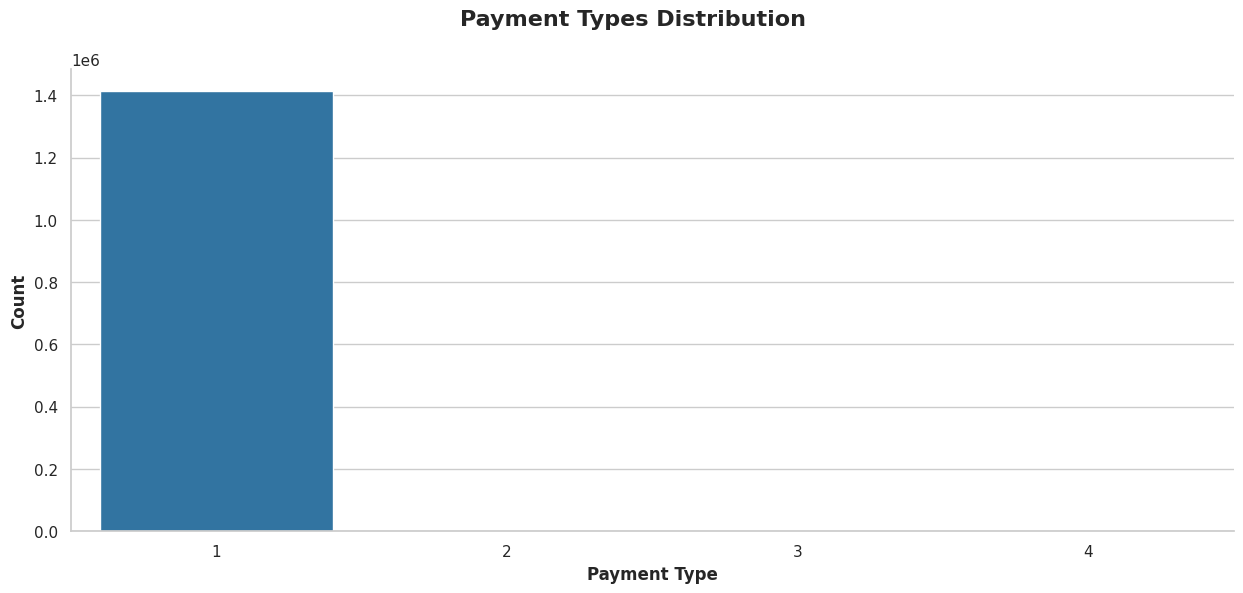

In [ ]:
# Analyse the distribution of different payment types (payment_type).

plt.figure(figsize=(15, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
palette = sns.color_palette("tab20")

ax = sns.countplot(
    x=df_valid_trip_data['payment_type'],
    palette=palette
)

ax.set_xlabel("Payment Type", fontdict={'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Count", fontdict={'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Payment Types Distribution", fontweight='bold', fontsize=16)
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



In [ ]:
df_valid_trip_data['payment_type'].value_counts()

payment_type
1    1412815
2         23
4         16
3          7
Name: count, dtype: int64

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd

import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("/content/drive/Othercomputers/My_MacBook_Air/MI_AL_Course/Course_3_Main_Program/Course_2_SQL_and_Statistics_Essentials/Module_6_EDA_Assignment_NYC_Taxi_Records_Analysis/taxi_zones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

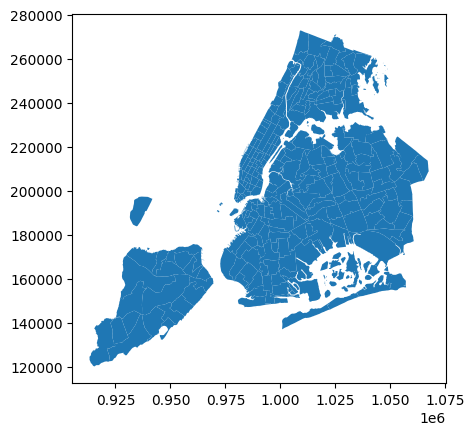

In [ ]:
# print(zones.info())
# zones.plot()

print(zones.info())

zones[["Shape_Leng", "Shape_Area", "geometry"]].plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using LocationID and PULocationID

df_valid_trip_data = pd.merge(
    df_valid_trip_data,
    zones,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

df_valid_trip_data["LocationID"].value_counts()

LocationID
237.0    69772
161.0    67703
236.0    63674
132.0    63543
162.0    52709
         ...  
111.0        1
182.0        1
23.0         1
253.0        1
11.0         1
Name: count, Length: 224, dtype: int64

In [ ]:
pickup_location = df_valid_trip_data.groupby(['zone', 'PULocationID']).size().reset_index(name='Number_of_trips')
pickup_location.sort_values(by='Number_of_trips', ascending=False, inplace=True)
pickup_location.head(10)  # Top 10 zones with highest number of trips

zone  PULocationID  Number_of_trips
199         Upper East Side South           237            69772
132                Midtown Center           161            67703
198         Upper East Side North           236            63674
103                   JFK Airport           132            63543
133                  Midtown East           162            52709
113             LaGuardia Airport           138            51670
116           Lincoln Square East           142            48957
155  Penn Station/Madison Sq West           186            48532
192     Times Sq/Theatre District           230            44269
141                   Murray Hill           170            43215

In [ ]:
df_valid_trip_data["zone"].head(10)

0           Yorkville West
1                 Flatiron
2             East Village
3    Upper East Side South
4    Upper East Side South
5    Upper East Side South
6             West Village
7             East Chelsea
8              Murray Hill
9             Midtown East
Name: zone, dtype: object

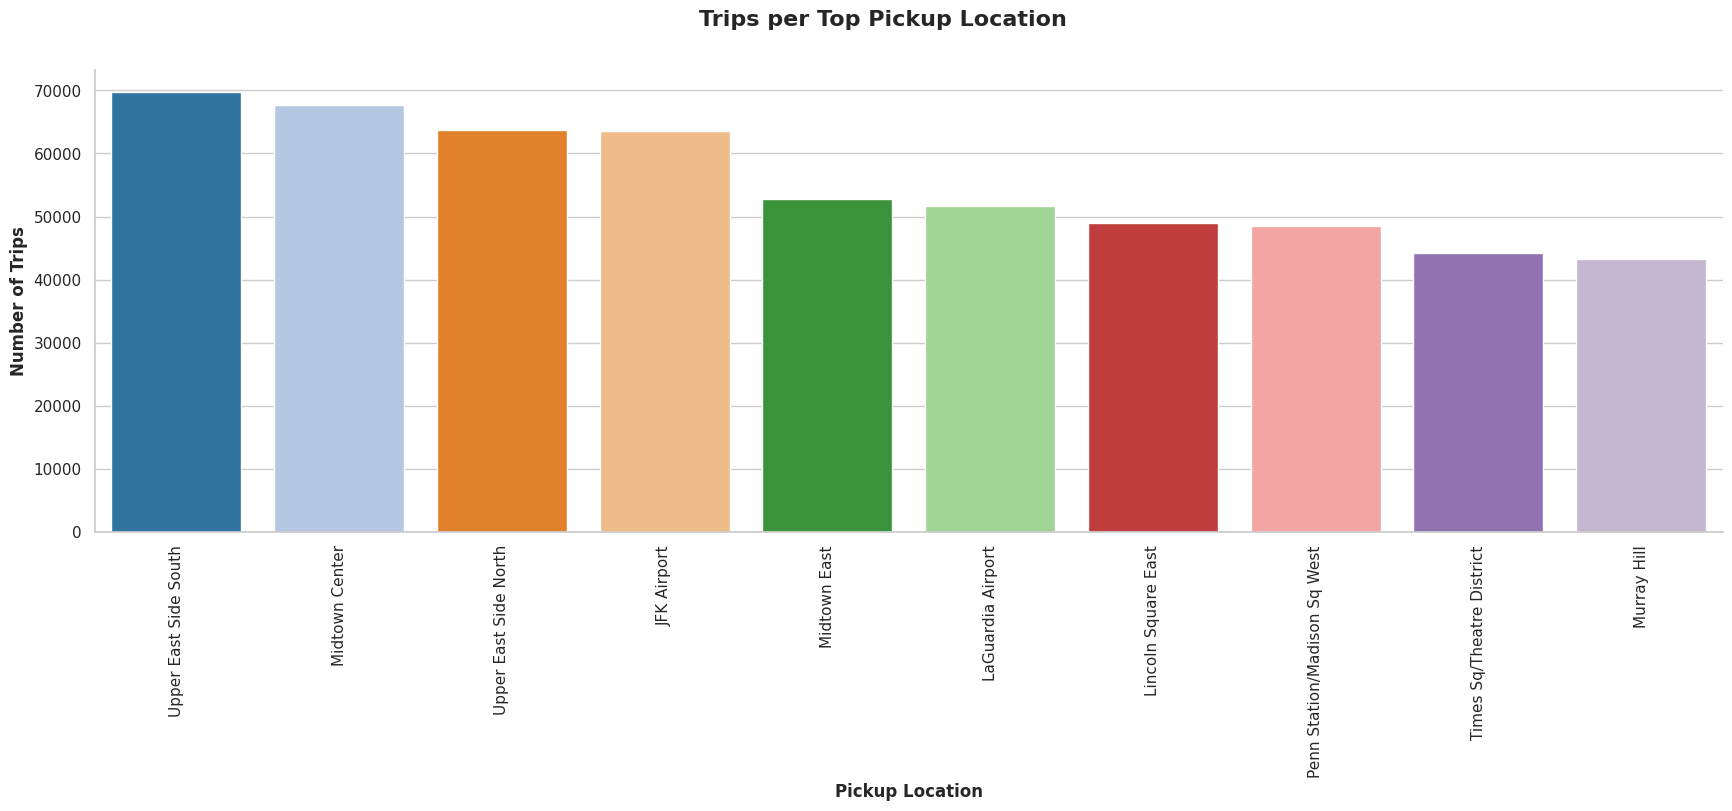

In [ ]:
# Group data by location and calculate the number of trips

plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc = custom_params)
palette = sns.color_palette("tab20")

ax = sns.barplot(
    x = 'zone',
    y = 'Number_of_trips',
    data = pickup_location.head(10),
    palette = palette
)

ax.set_xlabel("Pickup Location", fontdict = {'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Number of Trips", fontdict = {'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Trips per Top Pickup Location", fontweight='bold', fontsize=16)
plt.xticks(rotation = 90)
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(
    pickup_location,
    left_on = 'zone',
    right_on = 'zone',
    how = 'left'
)

In [ ]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'PULocationID', 'Number_of_trips'],
      dtype='object')

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

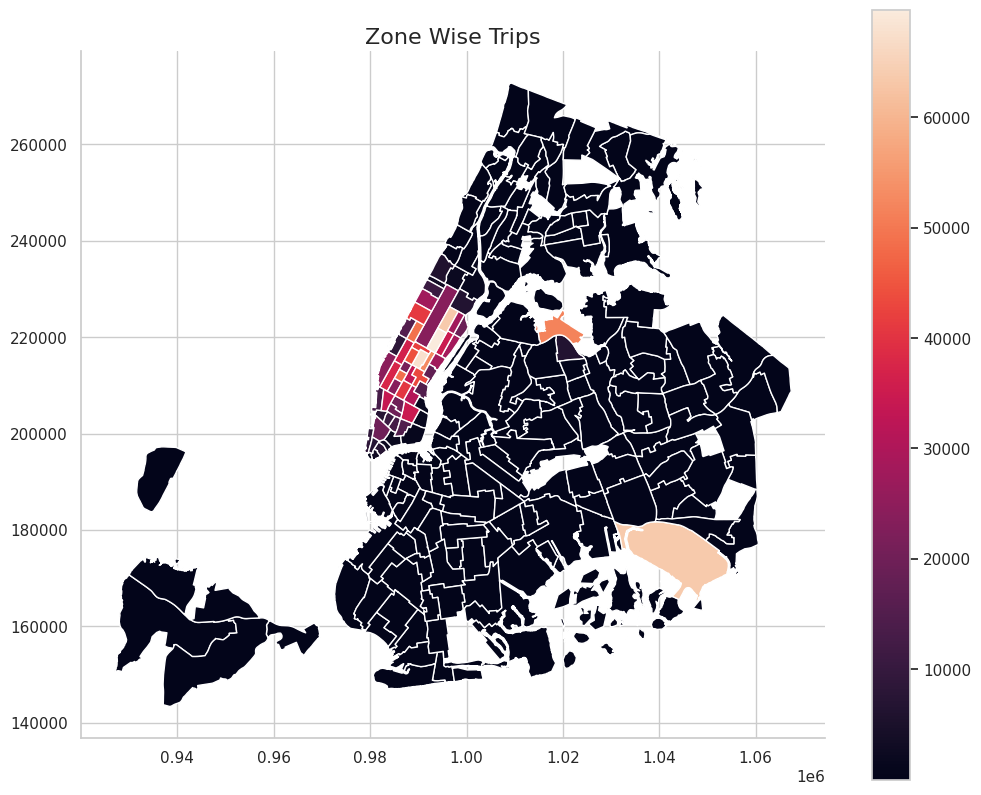

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(column='Number_of_trips', ax=ax, legend=True)

ax.set_title("Zone Wise Trips", fontsize=16)
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

zones.sort_values(by="Number_of_trips", ascending=False)

OBJECTID  Shape_Leng  Shape_Area                      zone  LocationID  \
236       237    0.042213    0.000096     Upper East Side South         237   
160       161    0.035804    0.000072            Midtown Center         161   
235       236    0.044252    0.000103     Upper East Side North         236   
131       132    0.245479    0.002038               JFK Airport         132   
161       162    0.035270    0.000048              Midtown East         162   
..        ...         ...         ...                       ...         ...   
209       210    0.114852    0.000453            Sheepshead Bay         210   
213       214    0.135300    0.000812  South Beach/Dongan Hills         214   
220       221    0.166218    0.000890                 Stapleton         221   
244       245    0.095983    0.000466             West Brighton         245   
258       259    0.126750    0.000395        Woodlawn/Wakefield         259   

           borough                                           geometry  \
236      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
131         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
161      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
..             ...                                                ...   
209       Brooklyn  POLYGON ((1004356.905 156081.405, 1004653.331 ...   
213  Staten Island  POLYGON ((960669.201 156319.132, 960902.551 15...   
220  Staten Island  POLYGON ((963349.728 171627.581, 963397.759 17...   
244  Staten Island  POLYGON ((957085.564 172591.26, 957142.385 172...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   

     PULocationID  Number_of_trips  
236         237.0          69772.0  
160         161.0          67703.0  
235         236.0          63674.0  
131         132.0          63543.0  
161         162.0          52709.0  
..            ...              ...  
209           NaN              NaN  
213           NaN              NaN  
220           NaN              NaN  
244           NaN              NaN  
258           NaN              NaN  

[263 rows x 9 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones




---
---

**1. Taxi 🏎 Activity Trends 📈 :**

* **Busy Times of Day: 🕔** Taxis are busiest in the evenings (between 5:00 PM and 7:00 PM). This is when most people are heading home from work.
* **Busy Days of the Week 📅:** Weekdays, especially Wednesday and Thursday, are busier for taxis than weekends. This is likely because more people are commuting to work during the middle of the week.
* **Busy Times of Year 🗓:** The summer months (May and June) and the period from October to December are busier for taxis. This is probably because of holidays and festivals.

**2. Revenue💲 Trends 📊:**

* **Best Quarters for Revenue:** Taxi companies make the most money in the second quarter (May, June, July) and the fourth quarter (October, November, December). This matches the times when taxis are busier, with the fourth quarter being the busiest because of the holiday season.

**3. Fare 💰 Information ℹ:**

* **Fare 💸 vs. Distance 🌎 :** The farther you travel in a taxi, the more you'll pay. There's a strong connection between trip distance and fare amount.

* **Fare 💸 vs. Trip Time ⏰ :** The longer your taxi ride takes, the more you'll pay, but this connection is not as strong as the one between fare and distance.

* **Fare 💸 vs. Number of Passengers 🧑‍🧑‍🧒:** Taxis tend to charge more when there's more than one passenger. Trips with 4 passengers are the most common.

* **Tips 💸 vs. Distance 🌎:** The farther you go in a taxi, the more you tend to tip. People give bigger tips on longer trips.


**4. Busiest Areas:🚦**

* **Popular Pickup Spots 🛍 :** The areas where taxis pick up the most passengers are Upper East Side South, Midtown Center, Upper East Side North, JFK Airport, and Midtown East.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
print(df_valid_trip_data.columns)

df_valid_trip_data.drop(
    ['OBJECTID', 'Shape_Leng', 'Shape_Area', 'borough', 'geometry'],
    axis=1,
    inplace=True
)

print(df_valid_trip_data.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'trip_duration_in_minutes',
       'trip_duration_in_hours', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry'],
      dtype='object')
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'trip_duration_in_minutes',
       'trip_duration_in_hours', 'zone', 'LocationID'],
      dtype='object')


In [ ]:
df_valid_trip_data.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         1  2023-01-01 00:55:02   2023-01-01 00:59:57              1.0   
4         2  2023-01-01 00:34:19   2023-01-01 00:46:44              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.85         1.0           263            41             1   
1           1.32         1.0            90           137             1   
2           3.17         1.0            79           141             1   
3           0.60         1.0           237           237             1   
4           2.55         1.0           237           239             1   

   fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
0         15.6  ...        4.12           0.0                    1.0   
1         12.8  ...        3.56           0.0                    1.0   
2         14.9  ...        3.98           0.0                    1.0   
3          6.5  ...        2.30           0.0                    1.0   
4         14.9  ...        1.50           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  trip_duration_in_minutes  \
0         24.72                   2.5          0.0                 12.450000   
1         21.36                   2.5          0.0                 13.366667   
2         23.88                   2.5          0.0                  9.250000   
3         13.80                   2.5          0.0                  4.916667   
4         21.40                   2.5          0.0                 12.416667   

   trip_duration_in_hours                   zone  LocationID  
0                0.207500         Yorkville West       263.0  
1                0.222778               Flatiron        90.0  
2                0.154167           East Village        79.0  
3                0.081944  Upper East Side South       237.0  
4                0.206944  Upper East Side South       237.0  

[5 rows x 22 columns]

In [ ]:
# Find routes which have the slowest speeds at different times of the day

# Getting Pickup location and Drop Off location
df_valid_trip_data.rename(columns={'zone': 'pickup_zone'}, inplace=True)
df_valid_trip_data.drop(columns=['LocationID'], inplace=True)

df_valid_trip_data = df_valid_trip_data.merge(
    zones[['LocationID', 'zone']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)

df_valid_trip_data.rename(columns={'zone': 'dropoff_zone'}, inplace=True)
df_valid_trip_data.drop(columns=['LocationID'], inplace=True)

In [ ]:
# Calculating speed for each trip
df_valid_trip_data['speed'] = df_valid_trip_data['trip_distance'] / df_valid_trip_data['trip_duration_in_hours']

df_slowest_routes = df_valid_trip_data.groupby(
    ['pickup_zone', 'PULocationID', 'dropoff_zone', 'DOLocationID', df_valid_trip_data['tpep_pickup_datetime'].dt.hour]
)['speed'].mean().reset_index()

# Sort the routes by average trip duration in descending order to identify the slowest routes
df_slowest_routes = df_slowest_routes.sort_values(by='speed', ascending=True).reset_index(drop=True)

# Top slowest routes by average speed
df_top_slowest_routes = df_slowest_routes.head(10)
df_slowest_routes.head(10)

pickup_zone  PULocationID               dropoff_zone  \
0  Greenwich Village South           114            Highbridge Park   
1  Greenwich Village South           114                    Gowanus   
2                Ridgewood           198             Bushwick North   
3                Chinatown            45                  Chinatown   
4             Midtown East           162               Midtown East   
5            East Elmhurst            70          LaGuardia Airport   
6            Alphabet City             4  West Chelsea/Hudson Yards   
7    Upper East Side South           237      Upper West Side North   
8             Clinton East            48            Pelham Bay Park   
9              Murray Hill           170                  Hudson Sq   

   DOLocationID  tpep_pickup_datetime      speed  
0           120                     1 -49.195021  
1           106                     1  -4.899083  
2            36                     1  -1.939163  
3            45                    10   0.059484  
4           162                     4   0.064780  
5           138                     6   0.085750  
6           246                    23   0.110949  
7           238                     4   0.120376  
8           184                     1   0.127919  
9           125                     2   0.131573

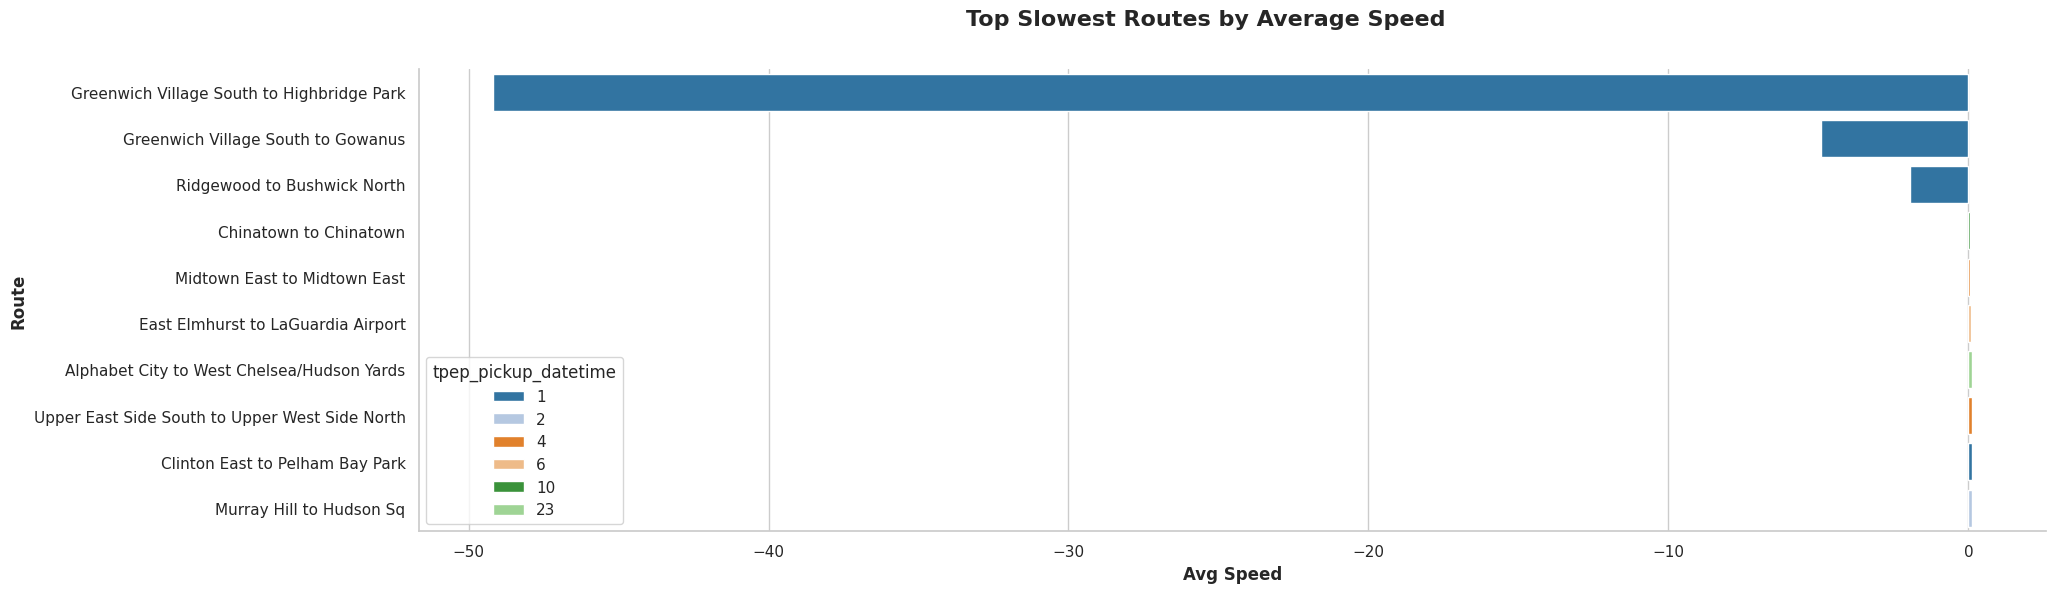

In [ ]:
plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc = custom_params)
palette = sns.color_palette("tab20")

ax = sns.barplot(
    x = 'speed',
    y = df_top_slowest_routes['pickup_zone'] + ' to ' + df_top_slowest_routes['dropoff_zone'],
    data = df_top_slowest_routes,
    palette = palette,
    hue = 'tpep_pickup_datetime'
)

ax.set_xlabel("Avg Speed", fontdict = {'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Route", fontdict = {'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Top Slowest Routes by Average Speed", fontweight='bold', fontsize=16)
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

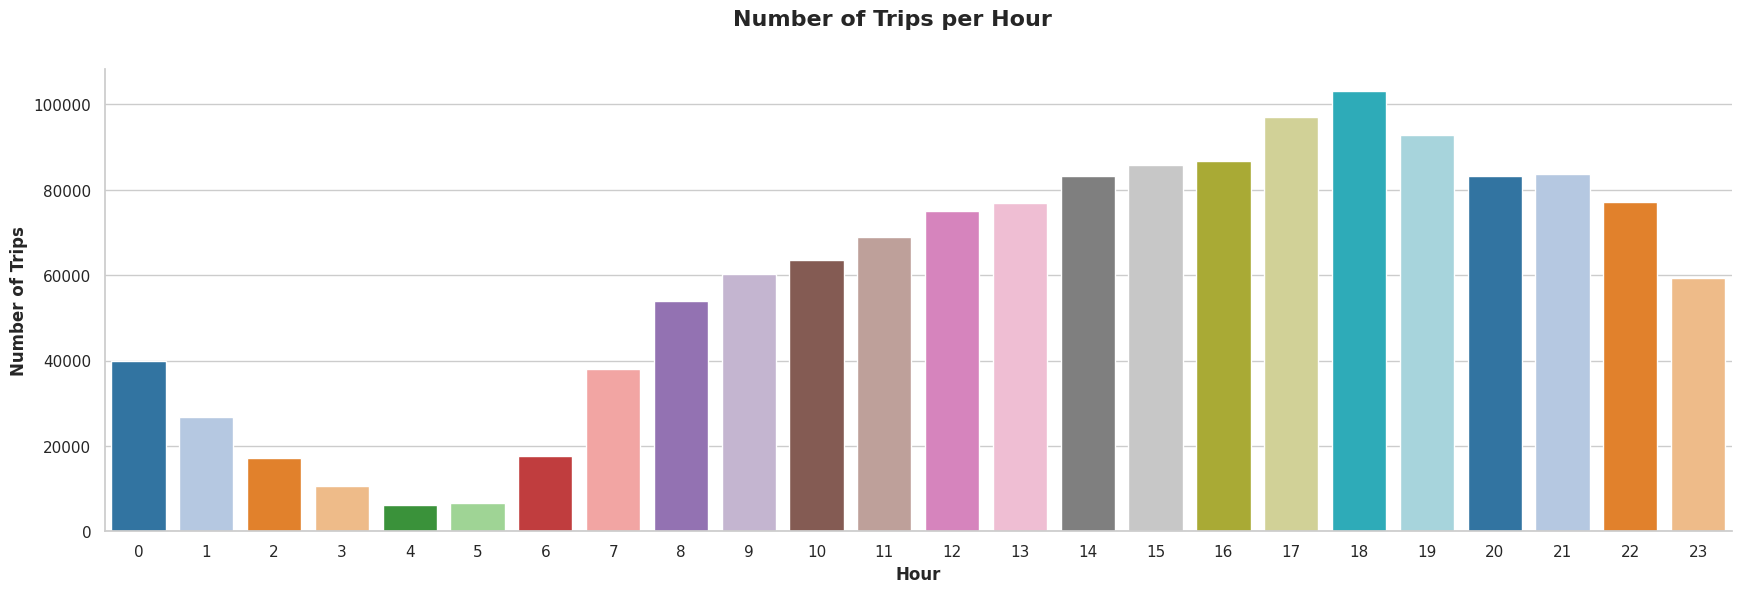

In [ ]:
# Visualise the number of trips per hour and find the busiest hour


plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
palette = sns.color_palette("tab20")

ax = sns.countplot(
    x=df_valid_trip_data['tpep_pickup_datetime'].dt.hour,
    palette=palette
)

ax.set_xlabel("Hour", fontdict={'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Number of Trips", fontdict={'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Number of Trips per Hour", fontweight='bold', fontsize=16)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

hourly_trips = df_valid_trip_data['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()  # Get the number of trips at each hour of the day
hourly_trips = hourly_trips / sample_fraction

hourly_trips.sort_values(ascending=False).head(10).reset_index(name="Number of Trips")

tpep_pickup_datetime  Number of Trips
0                    18        2061500.0
1                    17        1939680.0
2                    19        1855140.0
3                    16        1736580.0
4                    15        1714000.0
5                    21        1672100.0
6                    14        1662520.0
7                    20        1662500.0
8                    22        1543440.0
9                    13        1538300.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
df_valid_trip_data['tpep_pickup_datetime'].dt.day_name().value_counts()

tpep_pickup_datetime
Thursday     224990
Wednesday    221026
Friday       207875
Tuesday      206951
Saturday     203204
Sunday       174869
Monday       174098
Name: count, dtype: int64

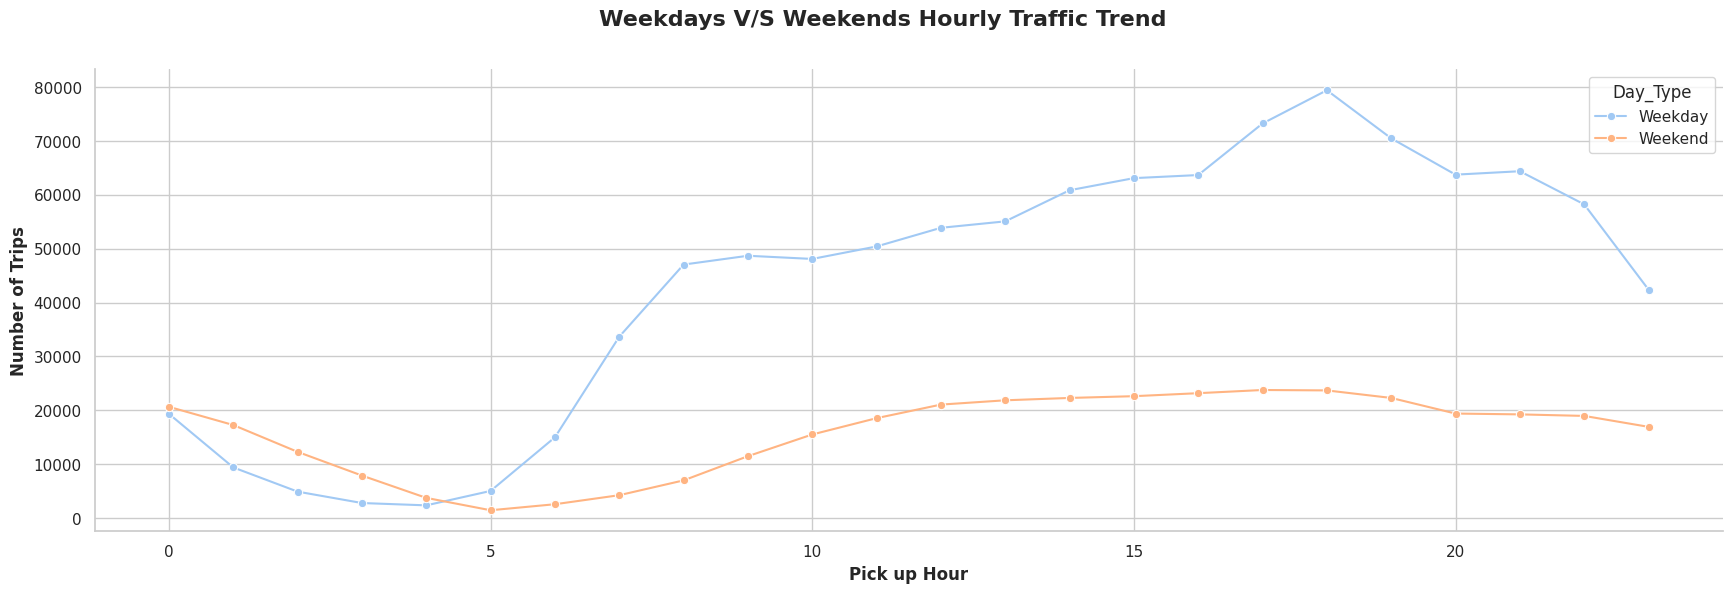

In [ ]:
# Compare traffic trends for the week days and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']


df_weekday_trips = df_valid_trip_data[
    df_valid_trip_data['tpep_pickup_datetime'].dt.day_name().isin(weekdays)
]['tpep_pickup_datetime'].dt.hour.value_counts()

df_weekend_trips = df_valid_trip_data[
    df_valid_trip_data['tpep_pickup_datetime'].dt.day_name().isin(weekends)
]['tpep_pickup_datetime'].dt.hour.value_counts()


df_weekday_trips = df_weekday_trips.reset_index()
df_weekday_trips.columns = ['pickup_hour', 'Number_of_trips']
df_weekday_trips['Day_Type'] = 'Weekday'

df_weekend_trips = df_weekend_trips.reset_index()
df_weekend_trips.columns = ['pickup_hour', 'Number_of_trips']
df_weekend_trips['Day_Type'] = 'Weekend'


# Line chart
plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
palette = sns.color_palette("pastel")

ax = sns.lineplot(
    data=pd.concat([df_weekday_trips, df_weekend_trips]),
    x='pickup_hour',
    y='Number_of_trips',
    hue='Day_Type',
    marker='o',
    palette=palette
)

ax.set_xlabel("Pick up Hour", fontdict={'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Number of Trips", fontdict={'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Weekdays V/S Weekends Hourly Traffic Trend", fontweight='bold', fontsize=16)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones
df_t10_pickup = df_valid_trip_data.groupby(
    ['pickup_zone', df_valid_trip_data['tpep_pickup_datetime'].dt.hour]
).size().reset_index(name='Number_of_trips')

df_t10_dropoff = df_valid_trip_data.groupby(
    ['dropoff_zone', df_valid_trip_data['tpep_dropoff_datetime'].dt.hour]
).size().reset_index(name='Number_of_trips')

print("Top 10 Pickup Zones:")
display(df_t10_pickup.sort_values(by='Number_of_trips', ascending=False).head(10))

print("-------------------------------------------")

print("Top 10 Dropoff Zones:")
display(df_t10_dropoff.sort_values(by='Number_of_trips', ascending=False).head(10))

Top 10 Pickup Zones: 


pickup_zone  tpep_pickup_datetime  Number_of_trips
1712         Midtown Center                    18             6059
1711         Midtown Center                    17             5795
2590  Upper East Side South                    17             5394
2591  Upper East Side South                    18             5389
1713         Midtown Center                    19             5329
2564  Upper East Side North                    15             5268
2587  Upper East Side South                    14             5196
2588  Upper East Side South                    15             5177
1710         Midtown Center                    16             5152
2589  Upper East Side South                    16             4994

-------------------------------------------
Top 10 Dropoff Zones: 


dropoff_zone  tpep_dropoff_datetime  Number_of_trips
4786  Upper East Side South                     18             5271
4762  Upper East Side North                     18             5219
4759  Upper East Side North                     15             5135
4761  Upper East Side North                     17             4875
4780  Upper East Side South                     12             4776
4758  Upper East Side North                     14             4745
4783  Upper East Side South                     15             4745
4760  Upper East Side North                     16             4724
4785  Upper East Side South                     17             4541
4782  Upper East Side South                     14             4473

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_trip_counts = df_valid_trip_data['pickup_zone'].value_counts().reset_index()
pickup_trip_counts.columns = ['zone', 'pickup_trip_counts']

dropoff_trip_counts = df_valid_trip_data['dropoff_zone'].value_counts().reset_index()
dropoff_trip_counts.columns = ['zone', 'dropoff_trip_counts']

zone_counts = pd.merge(
    pickup_trip_counts,
    dropoff_trip_counts,
    on='zone',
    how='outer'
).fillna(0)

zone_counts['pu_du_ratio'] = zone_counts['pickup_trip_counts'] / zone_counts['dropoff_trip_counts']

# Display the 10 highest and 10 lowest pickup/dropoff ratios
zone_counts = zone_counts[zone_counts['pu_du_ratio'] != np.inf]

print("Top 10 Highest Pickup/Dropoff Ratios")
display(zone_counts.sort_values(by='pu_du_ratio', ascending=False).head(10))

print("--------------------------------------------------------------------------------")

print("Top 10 Lowest Pickup/Dropoff Ratios")
display(zone_counts[zone_counts['pickup_trip_counts'] > 0].sort_values(by='pu_du_ratio', ascending=True).head(10))

Top 10 Highest Pickup/Dropoff Ratios


zone  pickup_trip_counts  \
66                      East Elmhurst              6402.0   
120                       JFK Airport             63591.0   
130                 LaGuardia Airport             51702.0   
179      Penn Station/Madison Sq West             48536.0   
200  Saint Michaels Cemetery/Woodside                11.0   
40                       Central Park             23915.0   
105           Greenwich Village South             19831.0   
242                      West Village             33833.0   
154                      Midtown East             52711.0   
153                    Midtown Center             67706.0   

     dropoff_trip_counts  pu_du_ratio  
66                 463.0    13.827214  
120              13443.0     4.730417  
130              18001.0     2.872174  
179              29474.0     1.646739  
200                  7.0     1.571429  
40               17234.0     1.387664  
105              14351.0     1.381855  
242              25430.0     1.330436  
154              41347.0     1.274845  
153              55312.0     1.224074

--------------------------------------------------------------------------------
Top 10 Lowest Pickup/Dropoff Ratios


zone  pickup_trip_counts  dropoff_trip_counts  \
220              Sunset Park East                 1.0                156.0   
198                  Saint Albans                 1.0                146.0   
67         East Flatbush/Farragut                 1.0                145.0   
165                Newark Airport                33.0               3912.0   
157                       Midwood                 2.0                236.0   
19               Bensonhurst West                 1.0                112.0   
17                        Belmont                 1.0                110.0   
201  Schuylerville/Edgewater Park                 1.0                109.0   
35                Cambria Heights                 1.0                108.0   
250               Windsor Terrace                 6.0                630.0   

     pu_du_ratio  
220     0.006410  
198     0.006849  
67      0.006897  
165     0.008436  
157     0.008475  
19      0.008929  
17      0.009091  
201     0.009174  
35      0.009259  
250     0.009524

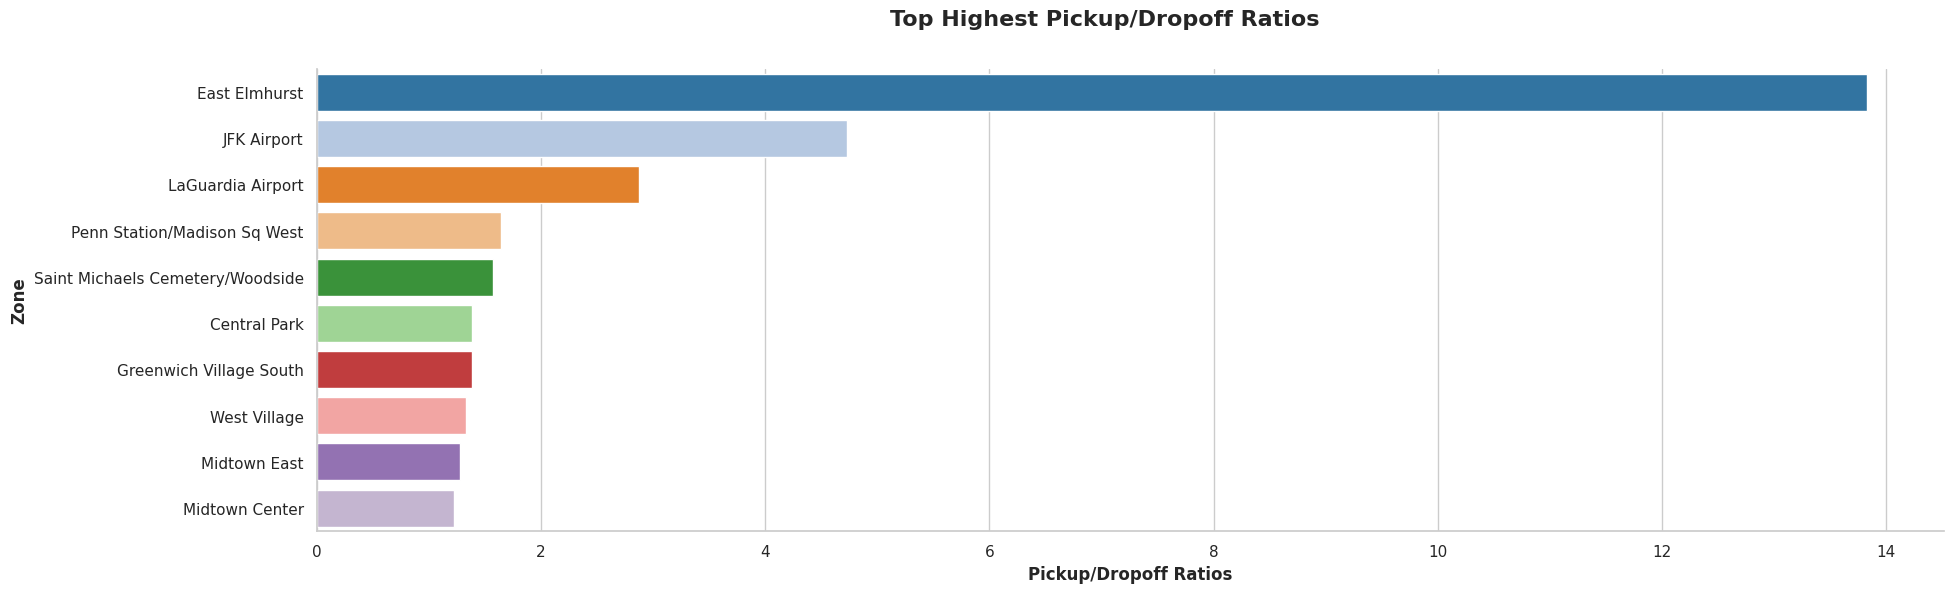

In [ ]:
plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc = custom_params)
palette = sns.color_palette("tab20")

ax = sns.barplot(
    x = 'pu_du_ratio',
    y = 'zone',
    data = zone_counts.sort_values(by='pu_du_ratio', ascending=False).head(10),
    palette = palette
)

ax.set_xlabel("Pickup/Dropoff Ratios", fontdict = {'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Zone", fontdict = {'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Top Highest Pickup/Dropoff Ratios", fontweight='bold', fontsize=16)
plt.show()

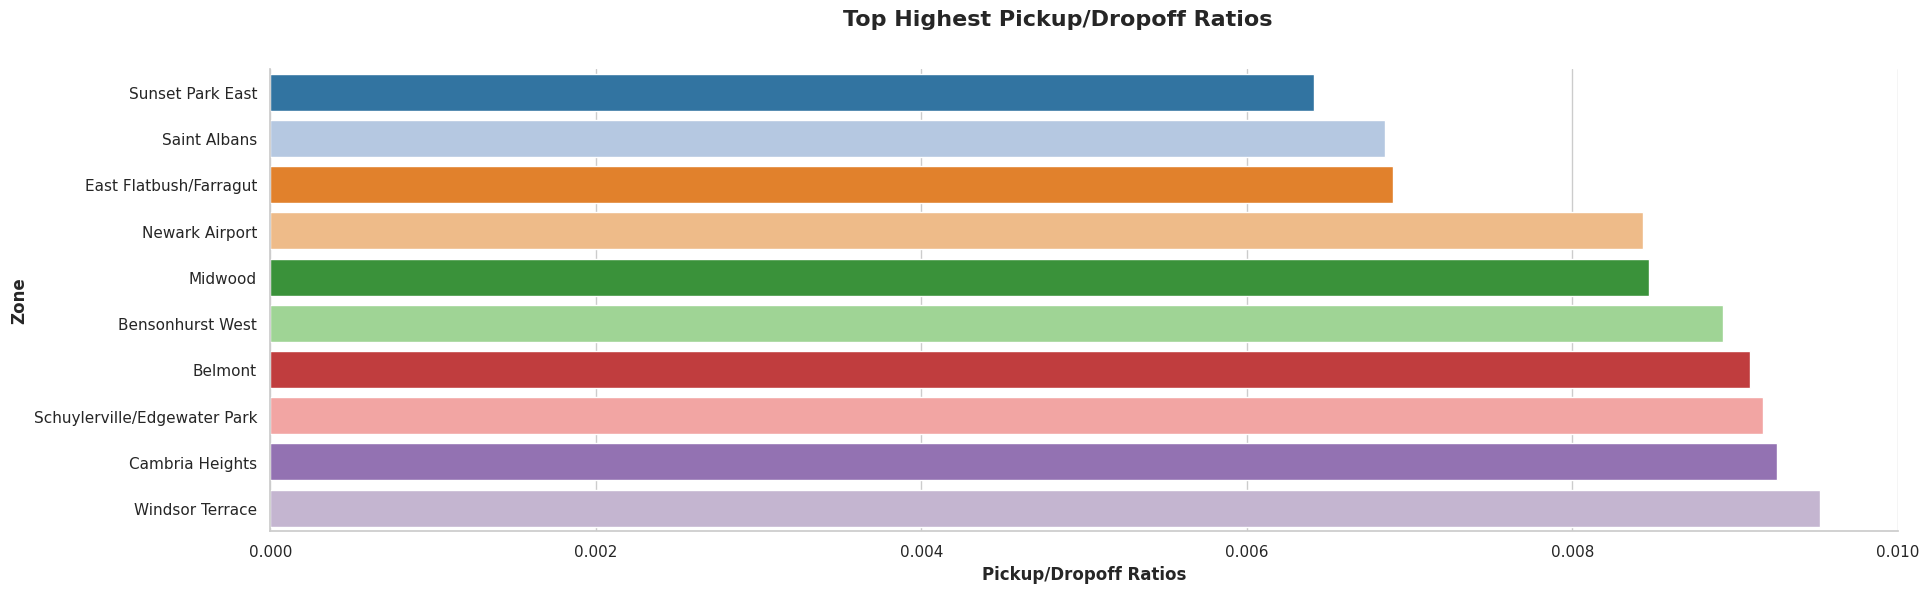

In [ ]:
plt.figure(figsize=(21, 6))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc = custom_params)
palette = sns.color_palette("tab20")

ax = sns.barplot(
    x = 'pu_du_ratio',
    y = 'zone',
    data = zone_counts[zone_counts['pickup_trip_counts'] > 0].sort_values(by='pu_du_ratio', ascending=True).head(10),
    palette = palette
)
ax.set_xlabel("Pickup/Dropoff Ratios", fontdict = {'fontweight': 'bold', 'fontsize': 12})
ax.set_ylabel("Zone", fontdict = {'fontweight': 'bold', 'fontsize': 12})
plt.suptitle("Top Highest Pickup/Dropoff Ratios", fontweight='bold', fontsize=16)
plt.show()

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

'Top 10 pickup zones during night hours'

pickup_zone  Trip Count
0                  East Village       12859
1                  West Village       10483
2                   JFK Airport        9494
3                  Clinton East        8030
4               Lower East Side        8027
5       Greenwich Village South        7274
6     Times Sq/Theatre District        5865
7  Penn Station/Madison Sq West        5365
8                 Midtown South        4792
9             LaGuardia Airport        4717

----------------------------------------------


'Top 10 dropoff zones during night hours'

dropoff_zone  Trip Count
0           East Village        6728
1           Clinton East        5128
2            Murray Hill        5063
3               Gramercy        4848
4           East Chelsea        4514
5        Lenox Hill West        4500
6         Yorkville West        4243
7           West Village        4114
8  Upper West Side South        3717
9  Upper East Side North        3679

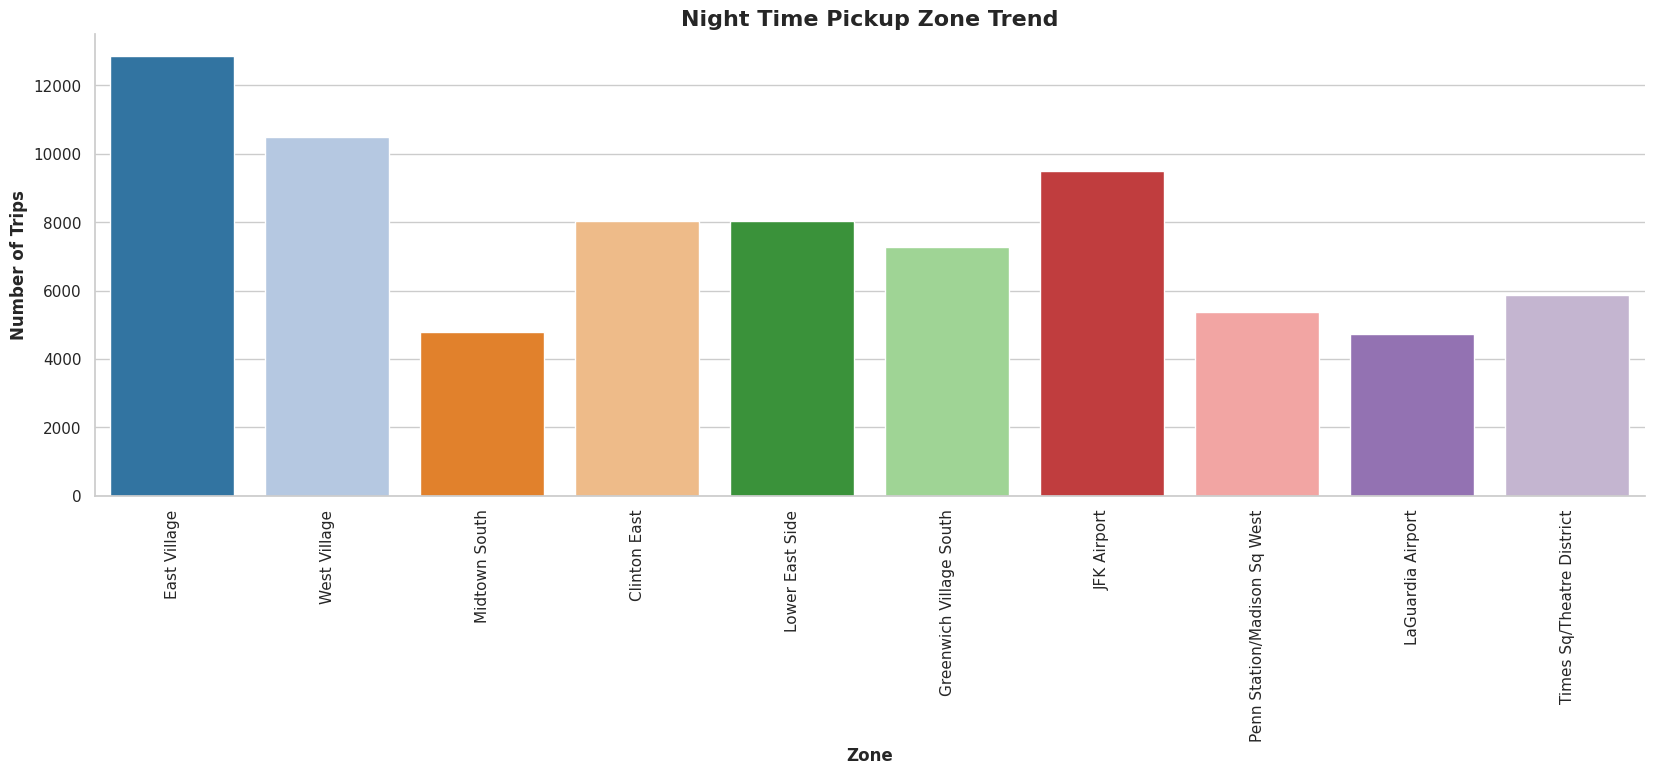

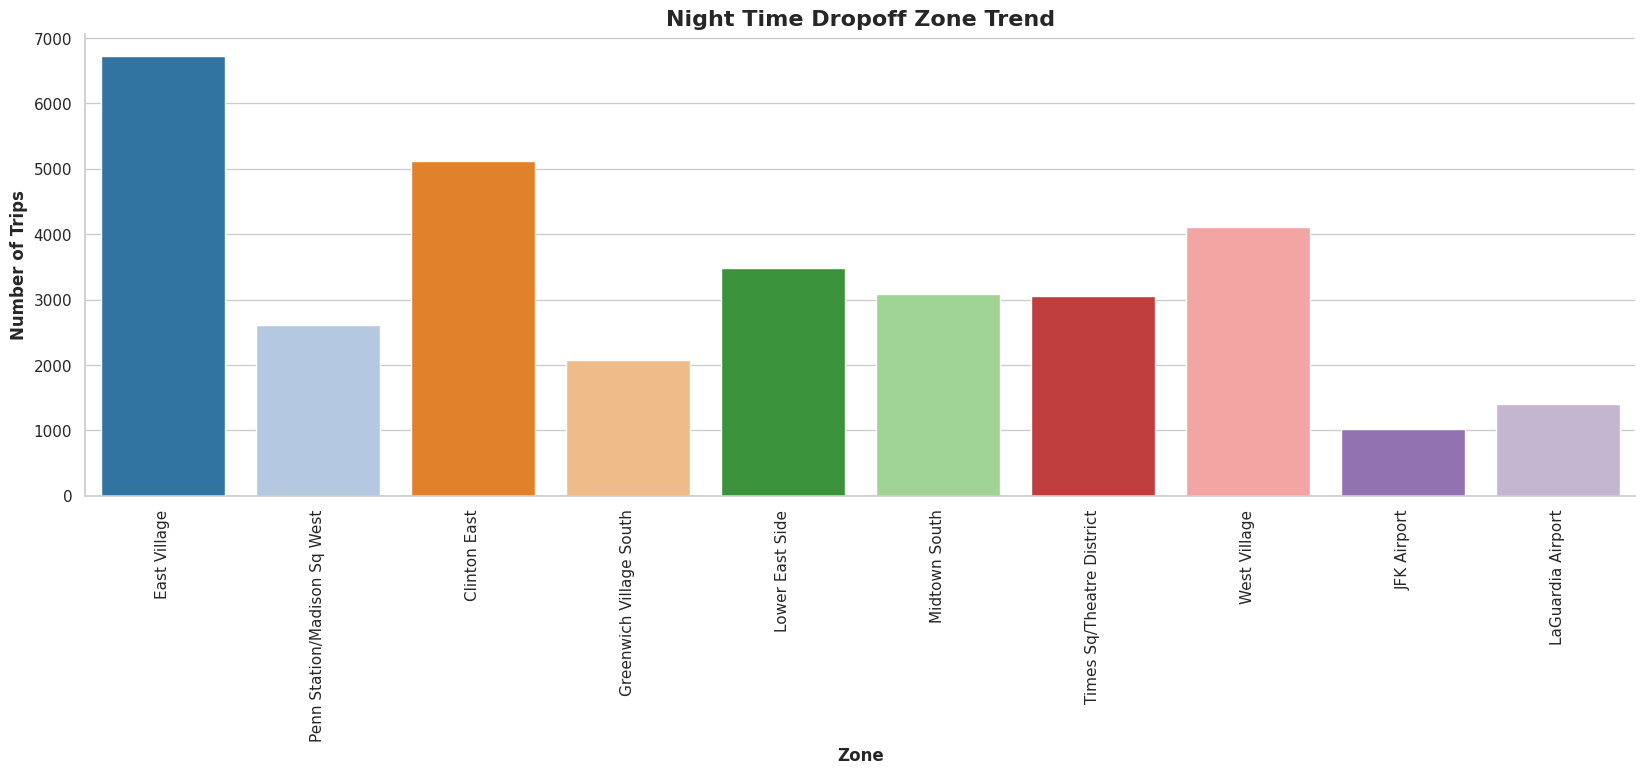

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23, 0, 1, 2, 3, 4, 5]
night_trips = df_valid_trip_data[df_valid_trip_data['tpep_pickup_datetime'].dt.hour.isin(night_hours)]

night_pickup_zones = night_trips['pickup_zone'].value_counts().head(10).index
night_dropoff_zones = night_trips['dropoff_zone'].value_counts().head(10).index

display(
    'Top 10 pickup zones during night hours',
    night_trips['pickup_zone'].value_counts().reset_index(name='Trip Count').head(10)
)

print("----------------------------------------------")

display(
    'Top 10 dropoff zones during night hours',
    night_trips['dropoff_zone'].value_counts().reset_index(name='Trip Count').head(10)
)

# Pickup Zone
plt.figure(figsize=(20, 6))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.countplot(
    x="pickup_zone",
    data=night_trips[night_trips["pickup_zone"].isin(night_pickup_zones)],
    palette="tab20"
)

plt.xlabel("Zone", fontdict={"fontweight": "bold", "fontsize": 12})
plt.ylabel("Number of Trips", fontdict={"fontweight": "bold", "fontsize": 12})
plt.title("Night Time Pickup Zone Trend", fontweight="bold", fontsize=16)
plt.xticks(rotation="vertical")
plt.show()

# Dropoff Zone
plt.figure(figsize=(20, 6))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.countplot(
    x="dropoff_zone",
    data=night_trips[night_trips["dropoff_zone"].isin(night_pickup_zones)],
    palette="tab20"
)

plt.xlabel("Zone", fontdict={"fontweight": "bold", "fontsize": 12})
plt.ylabel("Number of Trips", fontdict={"fontweight": "bold", "fontsize": 12})
plt.title("Night Time Dropoff Zone Trend", fontweight="bold", fontsize=16)
plt.xticks(rotation="vertical")
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

day_trips = df_valid_trip_data[
    ~df_valid_trip_data['tpep_pickup_datetime'].dt.hour.isin(night_hours)
]

night_revenue = night_trips['total_amount'].sum()
day_revenue = day_trips['total_amount'].sum()
total_revenue = night_revenue + day_revenue

night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

print(f"Night Time Revenue Share: {night_revenue_share:.2f}%")
print(f"Day Time Revenue Share: {day_revenue_share:.2f}%")


Night Time Revenue Share: 11.93%
Day Time Revenue Share: 88.07%


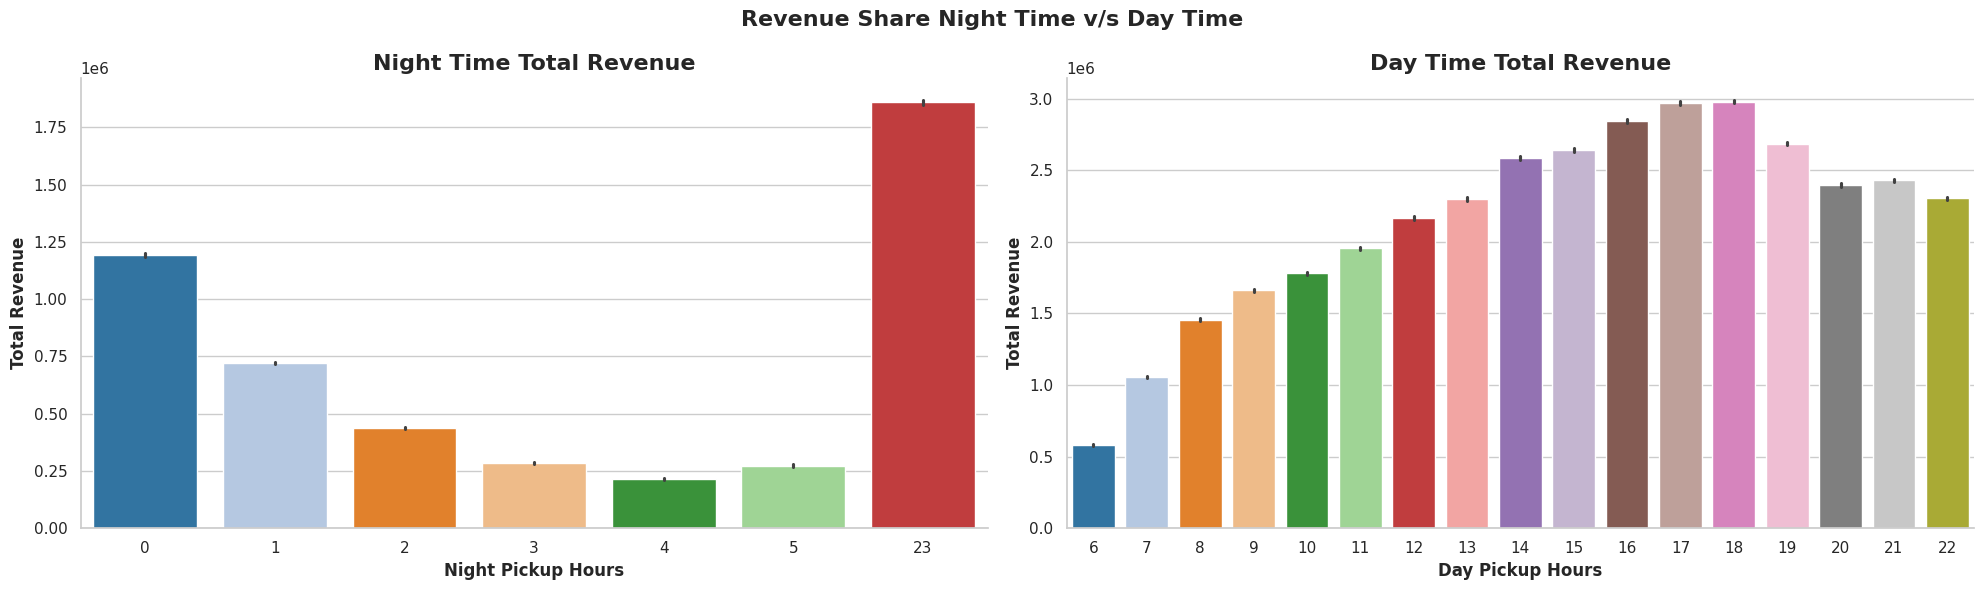

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})


# Night Time Revenue Share
sns.barplot(
    x=night_trips["tpep_pickup_datetime"].dt.hour,
    y=night_trips['total_amount'],
    palette="tab20",
    estimator=np.sum,
    ax=axes[0]
)
axes[0].set_xlabel("Night Pickup Hours", fontdict={"fontweight": "bold", "fontsize": 12})
axes[0].set_ylabel("Total Revenue", fontdict={"fontweight": "bold", "fontsize": 12})
axes[0].set_title("Night Time Total Revenue", fontweight="bold", fontsize=16)


# Day Time Revenue Share
sns.barplot(
    x=day_trips["tpep_pickup_datetime"].dt.hour,
    y=day_trips['total_amount'],
    palette="tab20",
    estimator=np.sum,
    ax=axes[1]
)
axes[1].set_xlabel("Day Pickup Hours", fontdict={"fontweight": "bold", "fontsize": 12})
axes[1].set_ylabel("Total Revenue", fontdict={"fontweight": "bold", "fontsize": 12})
axes[1].set_title("Day Time Total Revenue", fontweight="bold", fontsize=16)

plt.suptitle("Revenue Share Night Time v/s Day Time", fontweight="bold", fontsize=16)
plt.tight_layout()
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

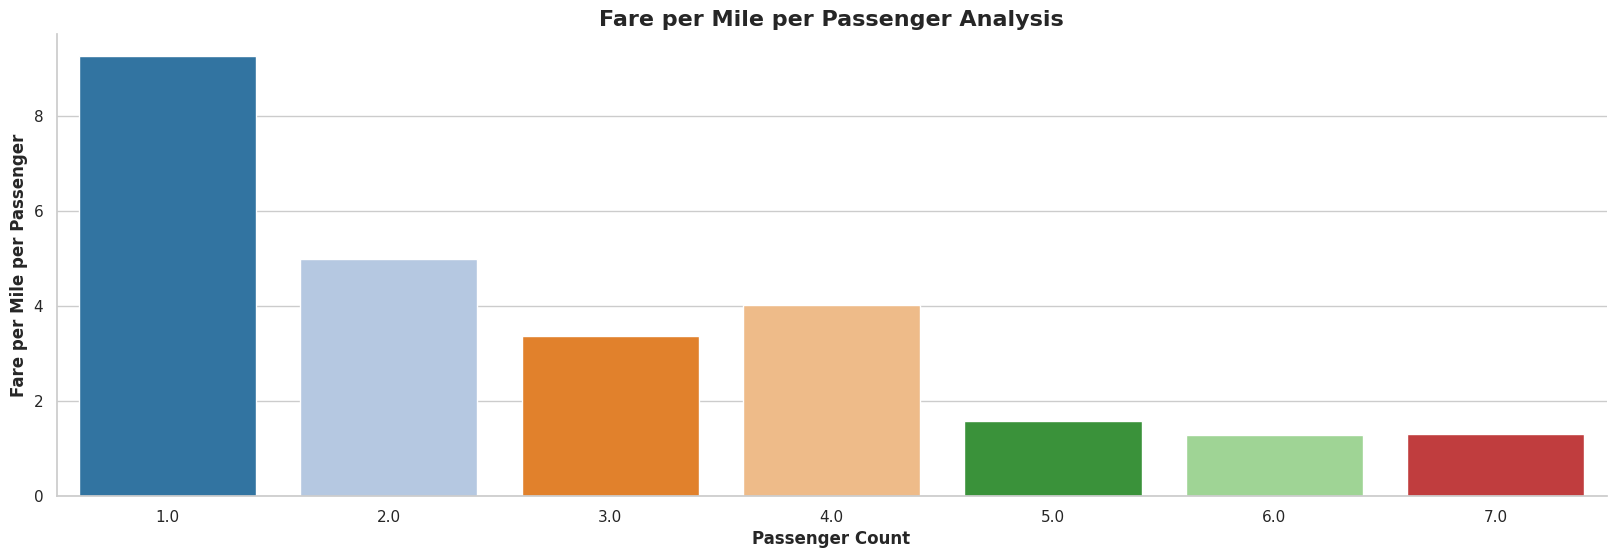

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

df_valid_trip_data['fare_per_mile'] = df_valid_trip_data['fare_amount'] / df_valid_trip_data['trip_distance']
df_valid_trip_data['fare_per_mile_per_passenger'] = df_valid_trip_data['fare_per_mile'] / df_valid_trip_data['passenger_count']

average_fare_per_mile_per_passenger = df_valid_trip_data.groupby(
    'passenger_count'
)['fare_per_mile_per_passenger'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})

sns.barplot(
    x='passenger_count',
    y='fare_per_mile_per_passenger',
    data=average_fare_per_mile_per_passenger,
    palette="tab20"
)

plt.xlabel("Passenger Count", fontdict={"fontweight": "bold", "fontsize": 12})
plt.ylabel("Fare per Mile per Passenger", fontdict={"fontweight": "bold", "fontsize": 12})
plt.title("Fare per Mile per Passenger Analysis", fontweight="bold", fontsize=16)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

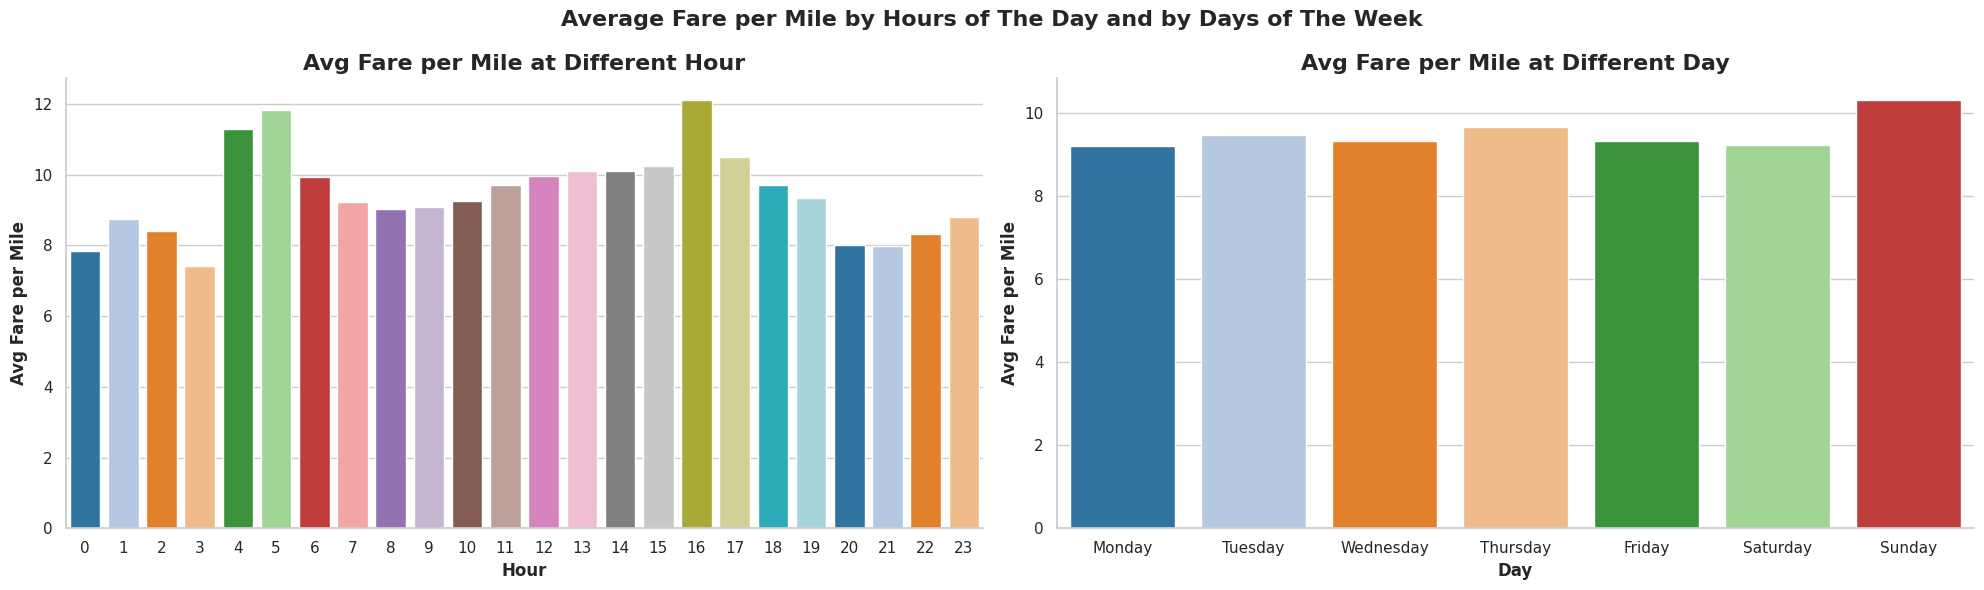

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})

# Average fare per mile for different times of the day
sns.barplot(
    x=df_valid_trip_data['tpep_pickup_datetime'].dt.hour,
    y='fare_per_mile',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[0]
)
axes[0].set_xlabel("Hour", fontdict={"fontweight": "bold", "fontsize": 12})
axes[0].set_ylabel("Avg Fare per Mile", fontdict={"fontweight": "bold", "fontsize": 12})
axes[0].set_title("Avg Fare per Mile at Different Hour", fontweight="bold", fontsize=16)


# Average fare per mile for different days
_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(
    x=df_valid_trip_data['tpep_pickup_datetime'].dt.day_name(),
    y='fare_per_mile',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[1],
    order=_order
)
axes[1].set_xlabel("Day", fontdict={"fontweight": "bold", "fontsize": 12})
axes[1].set_ylabel("Avg Fare per Mile", fontdict={"fontweight": "bold", "fontsize": 12})
axes[1].set_title("Avg Fare per Mile at Different Day", fontweight="bold", fontsize=16)

plt.suptitle("Average Fare per Mile by Hours of The Day and by Days of The Week", fontweight="bold", fontsize=16)
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
df_valid_trip_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'pickup_zone', 'borough', 'geometry', 'dropoff_zone'],
      dtype='object')

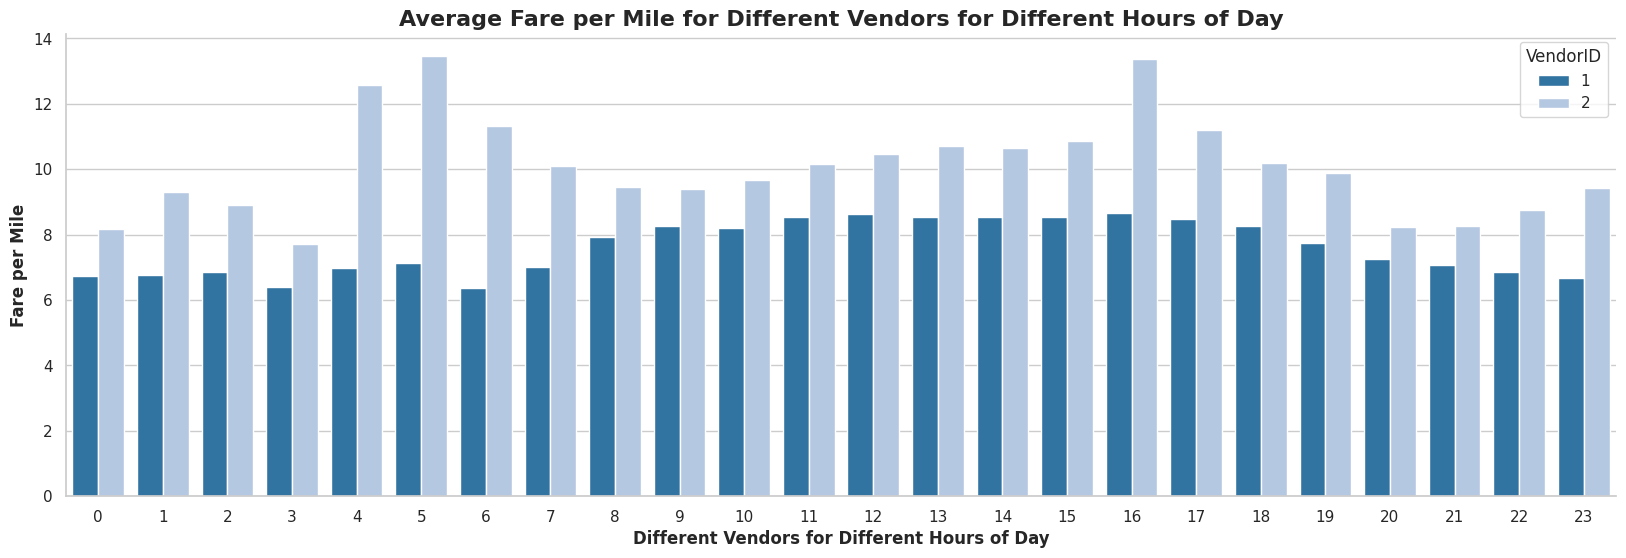

In [ ]:
# Compare fare per mile for different vendors

plt.figure(figsize=(20, 6))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})

sns.barplot(
    x=df_valid_trip_data['tpep_pickup_datetime'].dt.hour,
    hue='VendorID',
    y='fare_per_mile',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None
)

plt.xlabel(
    "Different Vendors for Different Hours of Day",
    fontdict={"fontweight": "bold", "fontsize": 12}
)
plt.ylabel("Fare per Mile", fontdict={"fontweight": "bold", "fontsize": 12})
plt.title(
    "Average Fare per Mile for Different Vendors for Different Hours of Day",
    fontweight="bold",
    fontsize=16
)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


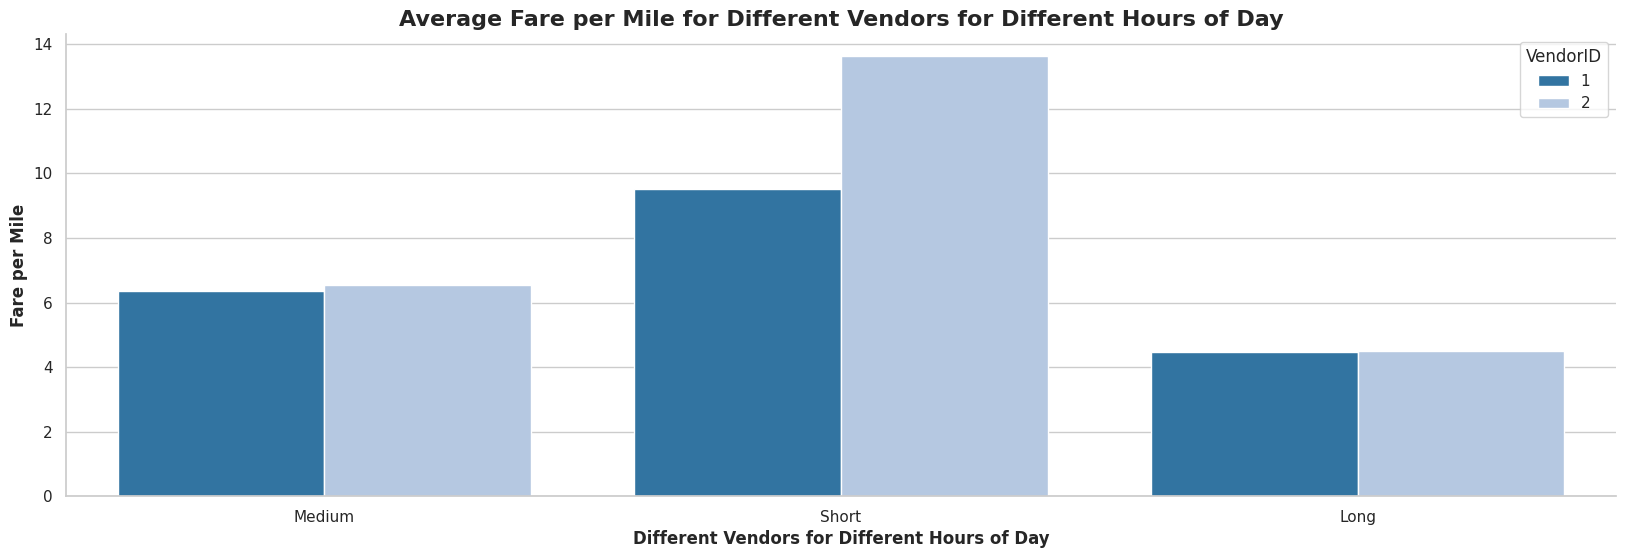

In [ ]:
def distance_category(distance):
    if distance <= 2:
        return 'Short'
    elif distance <= 5:
        return 'Medium'
    else:
        return 'Long'

df_valid_trip_data['distance_category'] = df_valid_trip_data['trip_distance'].apply(distance_category)

plt.figure(figsize=(20, 6))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})

sns.barplot(
    x='distance_category',
    y='fare_per_mile',
    data=df_valid_trip_data,
    palette="tab20",
    hue='VendorID',
    ci=None
)

plt.xlabel(
    "Different Vendors for Different Hours of Day",
    fontdict={"fontweight": "bold", "fontsize": 12}
)
plt.ylabel("Fare per Mile", fontdict={"fontweight": "bold", "fontsize": 12})
plt.title(
    "Average Fare per Mile for Different Vendors for Different Hours of Day",
    fontweight="bold",
    fontsize=16
)
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

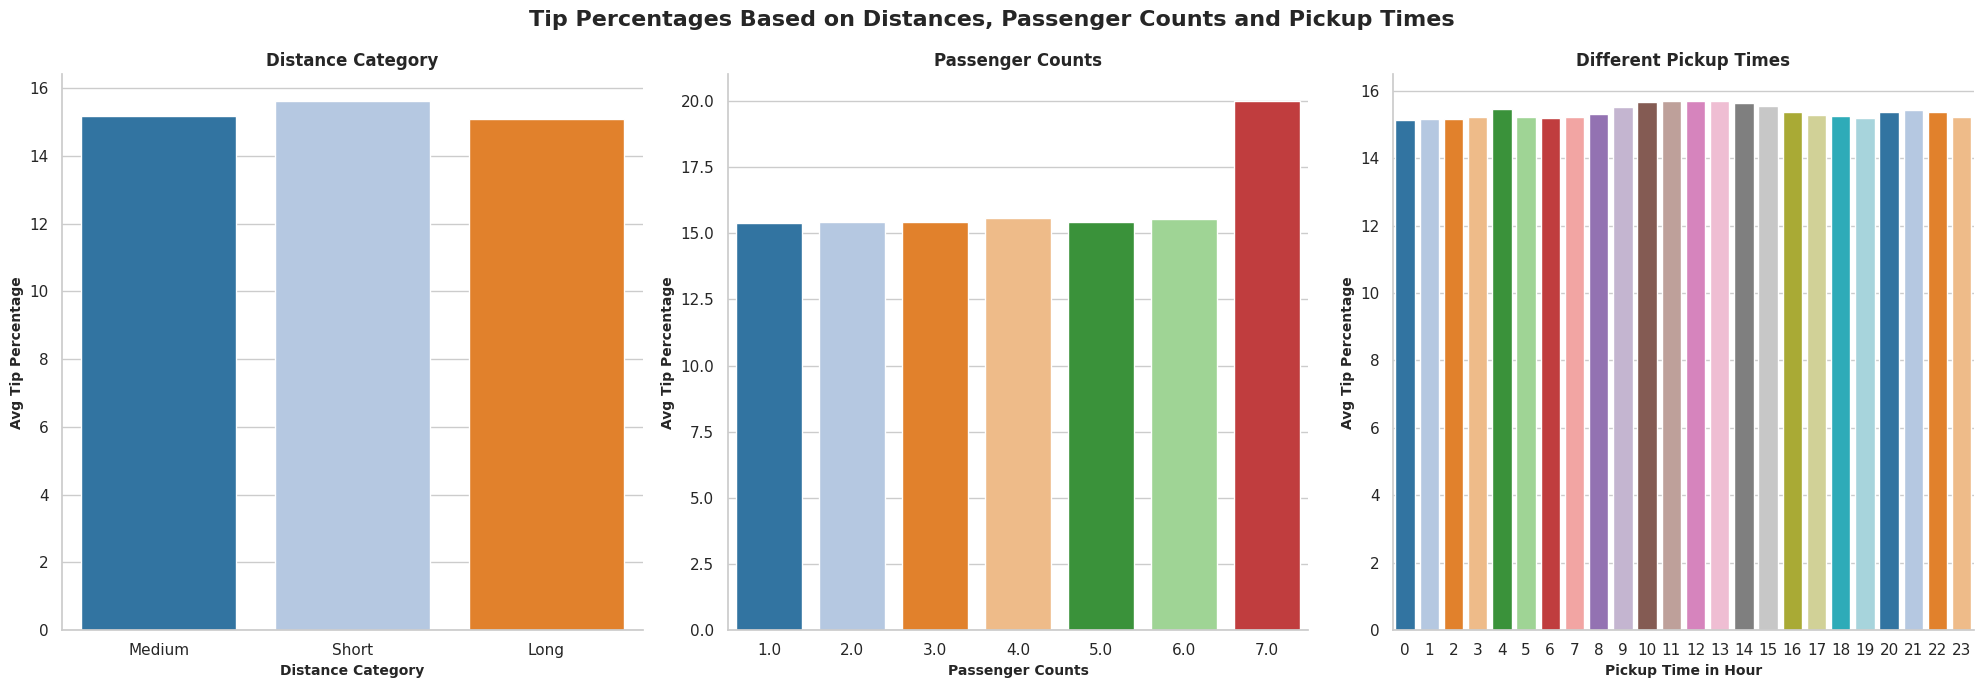

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_valid_trip_data['tip_percentage'] = (df_valid_trip_data['tip_amount'] / df_valid_trip_data['total_amount']) * 100


fig, axes = plt.subplots(1, 3, figsize=(20, 7))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})


# Avg Tip Percentage for Distance Category
sns.barplot(
    x='distance_category',
    y='tip_percentage',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[0]
)
axes[0].set_xlabel("Distance Category", fontdict={"fontweight": "bold", "fontsize": 10})
axes[0].set_ylabel("Avg Tip Percentage", fontdict={"fontweight": "bold", "fontsize": 10})
axes[0].set_title("Distance Category", fontweight="bold", fontsize=12)


# Avg Tip Percentage for passenger counts
sns.barplot(
    x='passenger_count',
    y='tip_percentage',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[1]
)
axes[1].set_xlabel("Passenger Counts", fontdict={"fontweight": "bold", "fontsize": 10})
axes[1].set_ylabel("Avg Tip Percentage", fontdict={"fontweight": "bold", "fontsize": 10})
axes[1].set_title("Passenger Counts", fontweight="bold", fontsize=12)



# Avg Tip Percentage at Different pickup times
sns.barplot(
    x=df_valid_trip_data['tpep_pickup_datetime'].dt.hour,
    y='tip_percentage',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[2]
)
axes[2].set_xlabel("Pickup Time in Hour", fontdict={"fontweight": "bold", "fontsize": 10})
axes[2].set_ylabel("Avg Tip Percentage", fontdict={"fontweight": "bold", "fontsize": 10})
axes[2].set_title("Different Pickup Times", fontweight="bold", fontsize=12)


plt.suptitle("Tip Percentages Based on Distances, Passenger Counts and Pickup Times", fontweight="bold", fontsize=16)
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

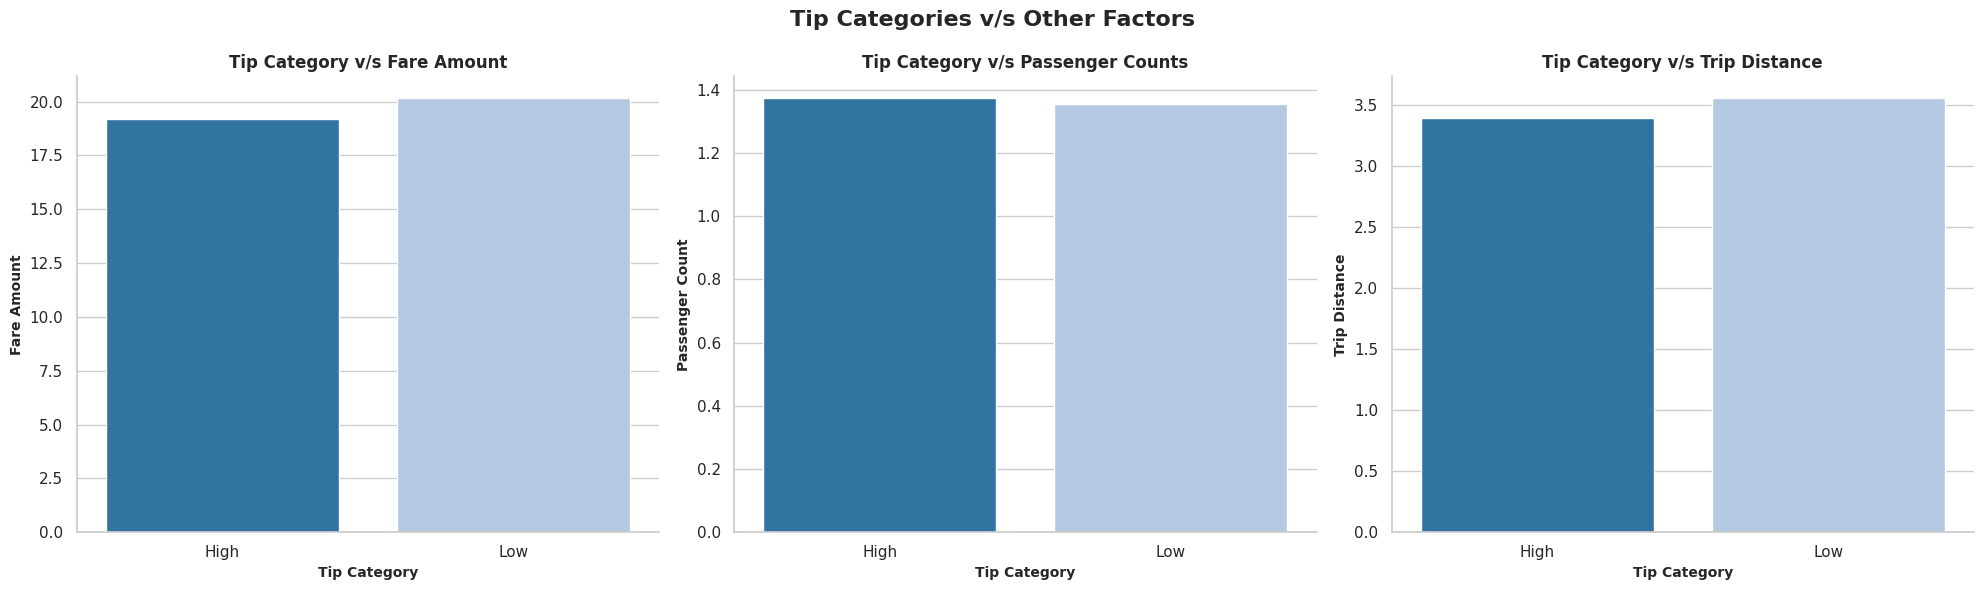

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df_valid_trip_data['tip_category'] = df_valid_trip_data['tip_percentage'].apply(lambda x: 'High' if x > 10 else 'Low')


fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})


# Avg Tip Percentage for Distance Category
sns.barplot(
    x='tip_category',
    y='fare_amount',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[0]
)
axes[0].set_xlabel("Tip Category", fontdict={"fontweight": "bold", "fontsize": 10})
axes[0].set_ylabel("Fare Amount", fontdict={"fontweight": "bold", "fontsize": 10})
axes[0].set_title("Tip Category v/s Fare Amount", fontweight="bold", fontsize=12)


# Tip Category v/s Passenger Counts
sns.barplot(
    x='tip_category',
    y='passenger_count',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[1]
)
axes[1].set_xlabel("Tip Category", fontdict={"fontweight": "bold", "fontsize": 10})
axes[1].set_ylabel("Passenger Count", fontdict={"fontweight": "bold", "fontsize": 10})
axes[1].set_title("Tip Category v/s Passenger Counts", fontweight="bold", fontsize=12)



# Tip Category v/s Trip Distance
sns.barplot(
    x='tip_category',
    y='trip_distance',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[2]
)
axes[2].set_xlabel("Tip Category", fontdict={"fontweight": "bold", "fontsize": 10})
axes[2].set_ylabel("Trip Distance", fontdict={"fontweight": "bold", "fontsize": 10})
axes[2].set_title("Tip Category v/s Trip Distance", fontweight="bold", fontsize=12)


plt.suptitle("Tip Categories v/s Other Factors", fontweight="bold", fontsize=16)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

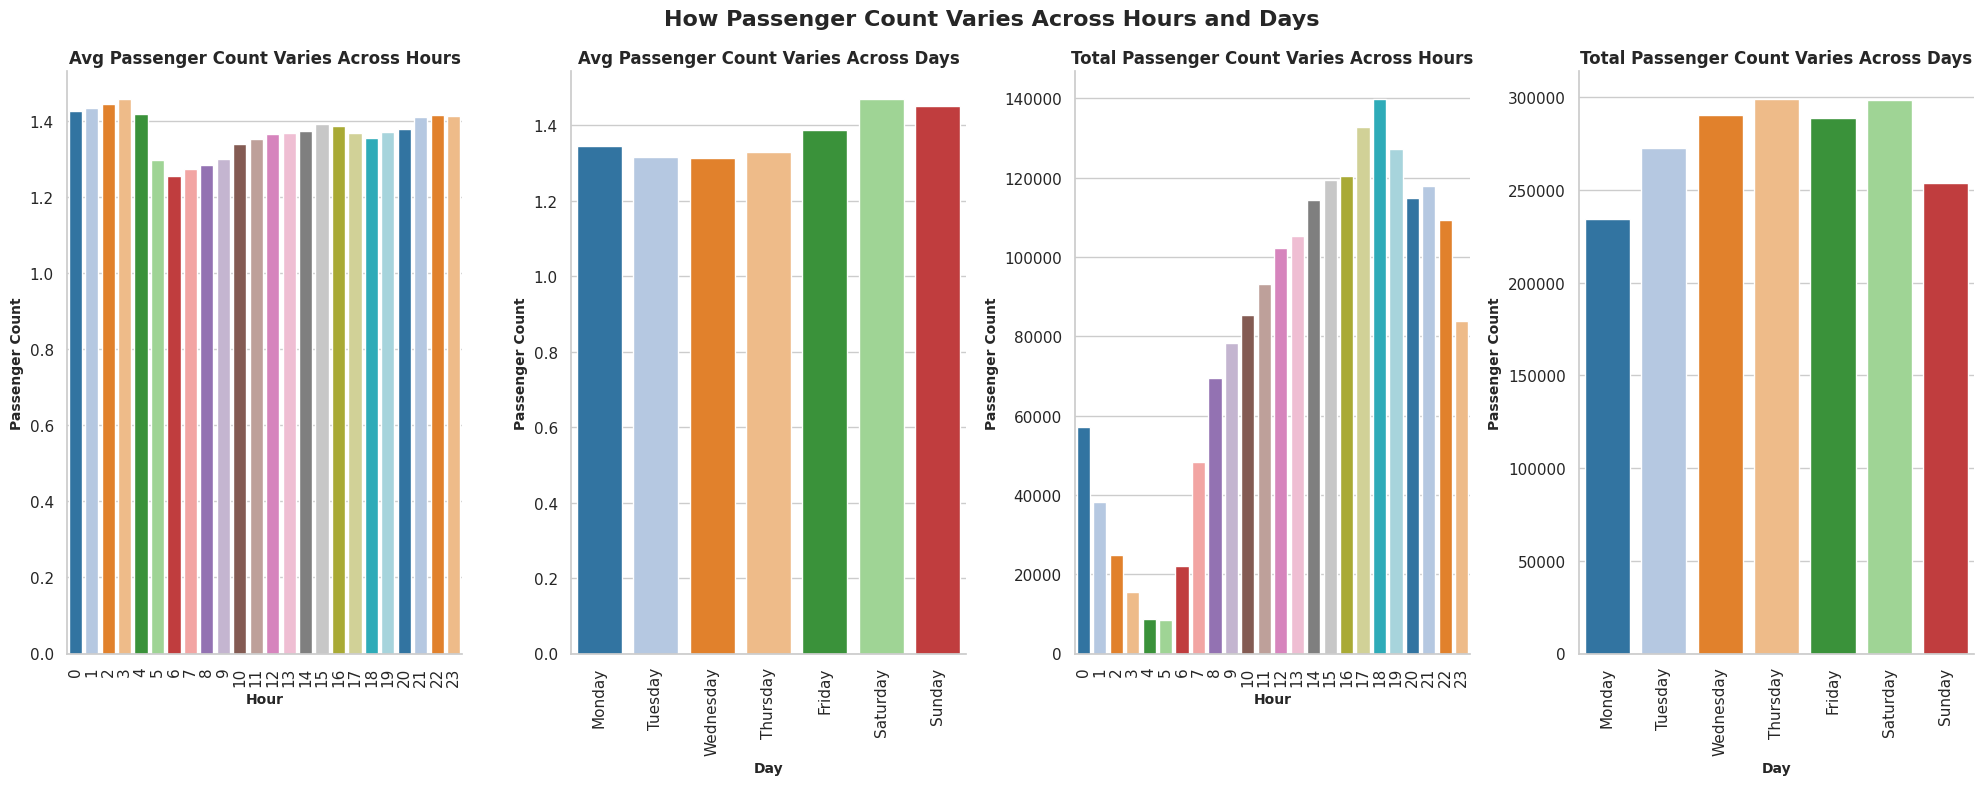

In [ ]:
# See how passenger count varies across hours and days

fig, axes = plt.subplots(1, 4, figsize=(20, 8))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})


# Avg Passenger Count Varies Across Hours
sns.barplot(
    x=df_valid_trip_data['tpep_pickup_datetime'].dt.hour,
    y='passenger_count',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[0]
)
axes[0].set_xlabel("Hour", fontdict={"fontweight": "bold", "fontsize": 10})
axes[0].set_ylabel("Passenger Count", fontdict={"fontweight": "bold", "fontsize": 10})
axes[0].set_title("Avg Passenger Count Varies Across Hours", fontweight="bold", fontsize=12)
axes[0].tick_params(axis='x', rotation=90)

# Avg Passenger Count Varies Across Days
_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(
    x=df_valid_trip_data['tpep_pickup_datetime'].dt.day_name(),
    y='passenger_count',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[1],
    order=_order
)
axes[1].set_xlabel("Day", fontdict={"fontweight": "bold", "fontsize": 10})
axes[1].set_ylabel("Passenger Count", fontdict={"fontweight": "bold", "fontsize": 10})
axes[1].set_title("Avg Passenger Count Varies Across Days", fontweight="bold", fontsize=12)
axes[1].tick_params(axis='x', rotation=90)


# Total Passenger Count Varies Across Hours
sns.barplot(
    x=df_valid_trip_data['tpep_pickup_datetime'].dt.hour,
    y='passenger_count',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[2],
    estimator = np.sum

)
axes[2].set_xlabel("Hour", fontdict={"fontweight": "bold", "fontsize": 10})
axes[2].set_ylabel("Passenger Count", fontdict={"fontweight": "bold", "fontsize": 10})
axes[2].set_title("Total Passenger Count Varies Across Hours", fontweight="bold", fontsize=12)
axes[2].tick_params(axis='x', rotation=90)


# Total Passenger Count Varies Across Days
sns.barplot(
    x=df_valid_trip_data['tpep_pickup_datetime'].dt.day_name(),
    y='passenger_count',
    data=df_valid_trip_data,
    palette="tab20",
    ci=None,
    ax=axes[3],
    order=_order,
    estimator = np.sum

)
axes[3].set_xlabel("Day", fontdict={"fontweight": "bold", "fontsize": 10})
axes[3].set_ylabel("Passenger Count", fontdict={"fontweight": "bold", "fontsize": 10})
axes[3].set_title("Total Passenger Count Varies Across Days", fontweight="bold", fontsize=12)
axes[3].tick_params(axis='x', rotation=90)

plt.suptitle("How Passenger Count Varies Across Hours and Days", fontweight="bold", fontsize=16)
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
df_valid_trip_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'trip_duration_in_minutes',
       'trip_duration_in_hours', 'pickup_zone', 'dropoff_zone', 'speed',
       'fare_per_mile', 'fare_per_mile_per_passenger', 'pickup_timeofday',
       'dropoff_timeofday', 'distance_category', 'tip_percentage',
       'tip_category'],
      dtype='object')

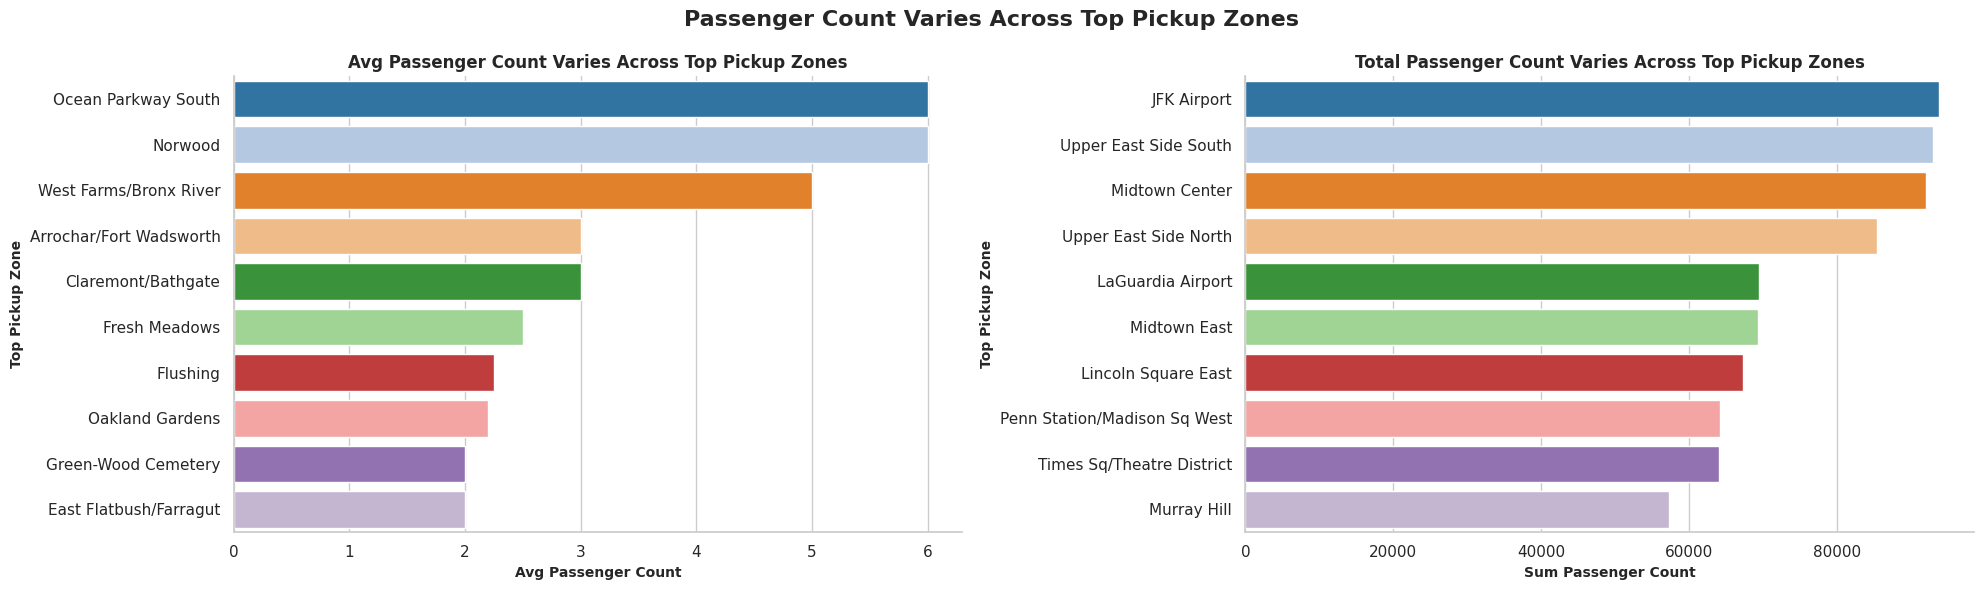

In [ ]:
# How does passenger count vary across zones

pickup_zone_avg_passenger_counts = df_valid_trip_data.groupby('pickup_zone')['passenger_count'].mean().reset_index()
pickup_zone_sum_passenger_counts = df_valid_trip_data.groupby('pickup_zone')['passenger_count'].sum().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})

# Avg Passenger Count Varies Across Zones
sns.barplot(
    x='passenger_count',
    y='pickup_zone',
    data=pickup_zone_avg_passenger_counts.sort_values(by='passenger_count', ascending=False).head(10),
    palette="tab20",
    ci=None,
    ax=axes[0]
)
axes[0].set_xlabel("Avg Passenger Count", fontdict={"fontweight": "bold", "fontsize": 10})
axes[0].set_ylabel("Top Pickup Zone", fontdict={"fontweight": "bold", "fontsize": 10})
axes[0].set_title("Avg Passenger Count Varies Across Top Pickup Zones", fontweight="bold", fontsize=12)


# Total Passenger Count Varies Across Days
sns.barplot(
    x='passenger_count',
    y='pickup_zone',
    data=pickup_zone_sum_passenger_counts.sort_values(by='passenger_count', ascending=False).head(10),
    palette="tab20",
    ci=None,
    ax=axes[1])
axes[1].set_xlabel("Sum Passenger Count", fontdict={"fontweight": "bold", "fontsize": 10})
axes[1].set_ylabel("Top Pickup Zone", fontdict={"fontweight": "bold", "fontsize": 10})
axes[1].set_title("Total Passenger Count Varies Across Top Pickup Zones", fontweight="bold", fontsize=12)


plt.suptitle("Passenger Count Varies Across Top Pickup Zones", fontweight="bold", fontsize=16)
plt.tight_layout()
plt.show()

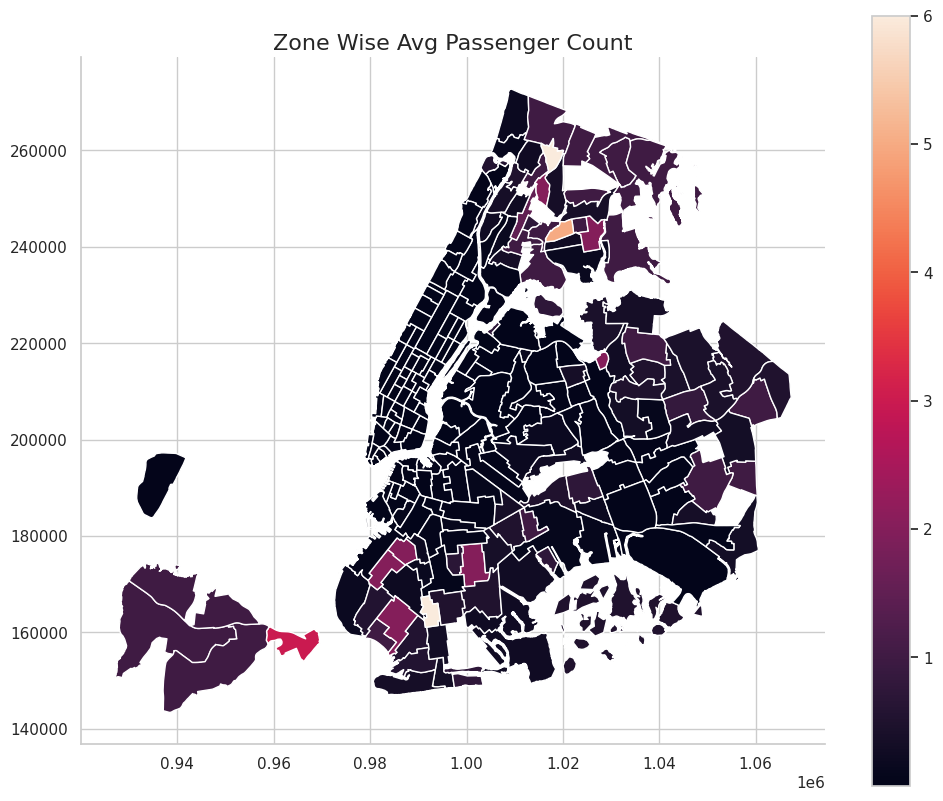

OBJECTID  Shape_Leng  Shape_Area                           zone  \
173       174    0.067818    0.000156                        Norwood   
177       178    0.068253    0.000176            Ocean Parkway South   
247       248    0.056919    0.000150         West Farms/Bronx River   
5           6    0.150491    0.000606        Arrochar/Fort Wadsworth   
21         22    0.126170    0.000472               Bensonhurst West   
226       227    0.082830    0.000268               Sunset Park East   
19         20    0.051440    0.000135                        Belmont   
110       111    0.059931    0.000209            Green-Wood Cemetery   
70         71    0.093169    0.000383         East Flatbush/Farragut   
249       250    0.079626    0.000241  Westchester Village/Unionport   

     LocationID        borough  \
173         174          Bronx   
177         178       Brooklyn   
247         248          Bronx   
5             6  Staten Island   
21           22       Brooklyn   
226         227       Brooklyn   
19           20          Bronx   
110         111       Brooklyn   
70           71       Brooklyn   
249         250          Bronx   

                                              geometry  PULocationID  \
173  POLYGON ((1018060.325 261167.655, 1017950.995 ...         174.0   
177  POLYGON ((992354.462 167321.878, 992446.939 16...         178.0   
247  POLYGON ((1021898.26 245357.487, 1022005.186 2...         248.0   
5    POLYGON ((966568.747 158679.855, 966615.256 15...           6.0   
21   POLYGON ((986318.162 166716.417, 987000.047 16...          22.0   
226  POLYGON ((986490.117 173249.044, 986291.305 17...         227.0   
19   POLYGON ((1016371.834 254183.401, 1016392.376 ...          20.0   
110  POLYGON ((985590.381 179611.82, 986202.162 179...         111.0   
70   POLYGON ((1003181.136 178017.614, 1003226.756 ...          71.0   
249  POLYGON ((1026991.885 245048.502, 1027255.054 ...         250.0   

     Number_of_trips                    pickup_zone  passenger_count  \
173              1.0                        Norwood              6.0   
177              1.0            Ocean Parkway South              6.0   
247              1.0         West Farms/Bronx River              5.0   
5                1.0        Arrochar/Fort Wadsworth              3.0   
21               1.0               Bensonhurst West              2.0   
226              1.0               Sunset Park East              2.0   
19               1.0                        Belmont              2.0   
110              1.0            Green-Wood Cemetery              2.0   
70               1.0         East Flatbush/Farragut              2.0   
249              1.0  Westchester Village/Unionport              2.0   

     average_passenger_count  
173                      6.0  
177                      6.0  
247                      5.0  
5                        3.0  
21                       2.0  
226                      2.0  
19                       2.0  
110                      2.0  
70                       2.0  
249                      2.0

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_trips = zones.merge(pickup_zone_avg_passenger_counts, left_on='zone', right_on='pickup_zone', how='left')
zones_with_trips['average_passenger_count'] = zones_with_trips['passenger_count'] / zones_with_trips['Number_of_trips']

fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones_with_trips.plot(column ='average_passenger_count', ax = ax, legend = True)

ax.set_title("Zone Wise Avg Passenger Count", fontsize = 16)
plt.show()

zones_with_trips.sort_values(by='average_passenger_count', ascending=False).head(10)

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?
surcharge_columns = [
    'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
    'improvement_surcharge', 'congestion_surcharge', 'airport_fee'
]

surcharge_frequencies = df_valid_trip_data[surcharge_columns].astype(bool).sum(axis=0).reset_index()
surcharge_frequencies.columns = ['Surcharge_Type', 'Frequency']

display(surcharge_frequencies.sort_values(by='Frequency', ascending=False))

Surcharge_Type  Frequency
2             tip_amount    1413013
4  improvement_surcharge    1412993
1                mta_tax    1405036
5   congestion_surcharge    1341515
0                  extra     897837
6            airport_fee     116219
3           tolls_amount     114509

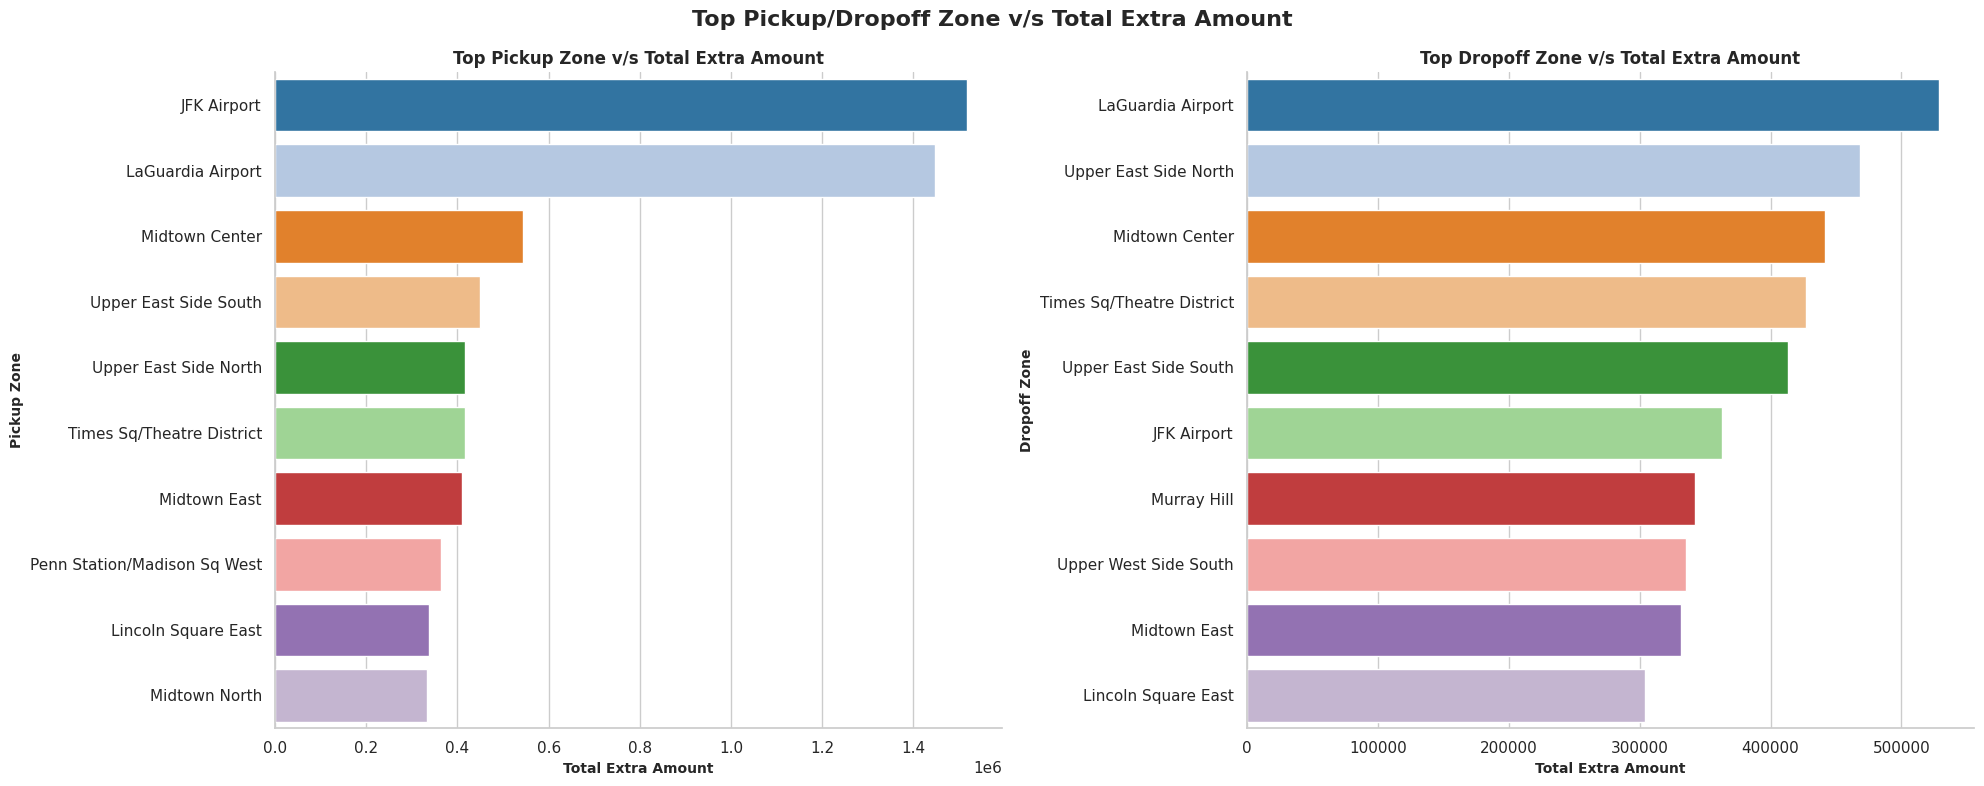

In [ ]:
df_valid_trip_data['total_extra_amount'] = (
    df_valid_trip_data['extra'] +
    df_valid_trip_data['mta_tax'] +
    df_valid_trip_data['tip_amount'] +
    df_valid_trip_data['tolls_amount'] +
    df_valid_trip_data['tolls_amount'] +
    df_valid_trip_data['improvement_surcharge']
)

pickup_extra_charges = df_valid_trip_data.groupby(
    'pickup_zone'
)['total_extra_amount'].sum().reset_index(name='total_extra_amount')

dropoff_extra_charges = df_valid_trip_data.groupby(
    'dropoff_zone'
)['total_extra_amount'].sum().reset_index(name='total_extra_amount')

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.set_theme(style="whitegrid", rc={"axes.spines.right": False, "axes.spines.top": False})



# Pickup Zone v/s Total Extra Amount
sns.barplot(
    y='pickup_zone',
    x='total_extra_amount',
    data=pickup_extra_charges.sort_values(
        by='total_extra_amount', ascending=False
    ).head(10),
    palette="tab20",
    ci=None,
    ax=axes[0]
)


axes[0].set_ylabel("Pickup Zone", fontdict={"fontweight": "bold", "fontsize": 10})
axes[0].set_xlabel("Total Extra Amount", fontdict={"fontweight": "bold", "fontsize": 10})
axes[0].set_title(
    "Top Pickup Zone v/s Total Extra Amount", fontweight="bold", fontsize=12
)



# Dropoff Zone v/s Total Extra Amount
sns.barplot(
    y='dropoff_zone',
    x='total_extra_amount',
    data=dropoff_extra_charges.sort_values(
        by='total_extra_amount', ascending=False
    ).head(10),
    palette="tab20",
    ci=None,
    ax=axes[1]
)


axes[1].set_ylabel("Dropoff Zone", fontdict={"fontweight": "bold", "fontsize": 10})
axes[1].set_xlabel("Total Extra Amount", fontdict={"fontweight": "bold", "fontsize": 10})
axes[1].set_title(
    "Top Dropoff Zone v/s Total Extra Amount", fontweight="bold", fontsize=12
)

plt.suptitle(
    "Top Pickup/Dropoff Zone v/s Total Extra Amount", fontweight="bold", fontsize=16
)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

####Recommendations for Better Taxi Service

* **Handling Busy Times:**

    🟢 Our data shows that evenings (5:00 PM - 7:00 PM) on weekdays are very busy for taxi pickups. To handle this, we should have more taxis available during these hours.
    Similarly, late nights on weekends (11:00 PM - 5:00 AM) are also a busy time, so we need more taxis then too.

* **Finding the Best Routes:**

    🟢 We've figured out which routes tend to be slow, especially when it's busy. We can use this information, along with up-to-the-minute traffic updates, to guide taxis to quicker routes.

    🟢 We also know which areas have the most pickups and drop-offs. We can prioritize sending taxis to these popular areas to make sure people get picked up and dropped off quickly.
    We should put more taxis in busy areas like Upper East Side South, Midtown Center, and JFK Airport when it's peak time.

    🟢 During slower times, we can reduce the number of taxis in less busy areas to save resources.

* **Making Customers Happy:**

    🟢 We need to make sure taxis are easy to find in busy areas and during busy times, so people don't have to wait a long time. This will make customers happier.

    🟢 We can offer discounts during slow times and in less busy areas to encourage more people to take taxis and make sure our taxis are being used effectively.
    In short:

* **By using these recommendations, taxi companies can improve their service by:**

    ✅ Getting taxis to customers faster.
    ✅ Using their taxis more efficiently.
    ✅ Making customers happier with the service.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

###Recommendations for Placing Taxis in the City

🟢 **Busy Areas:**

Our data tells us that areas like Upper East Side South, Midtown Center, Upper East Side North, JFK Airport, and Midtown East are where lots of people need taxis. We should put more taxis in these areas, especially when it's busy, so people don't have to wait.


🟢 **Busy Times (Weekdays):**

On weekdays, evenings are the busiest time. So, we should have more taxis in places where people work and live during those hours.


🟢 **Busy Times (Weekends):**

On weekends, evenings and late nights are busy. We should put more taxis in places where people go to shop, have fun, and visit, like stores, entertainment areas, and tourist spots.

🟢 **Busy Seasons:**

We see more demand for taxis in the summer (May, June) and around the holidays (October - December). During these times, we could add extra taxis to handle the increased number of riders.

---

### To make sure taxis are in the right place at the right time:

Put more taxis in areas where lots of people go.

* ✅ Put more taxis out during busy times on weekdays, weekends, and during busy seasons.
* ✅ Work with local businesses to provide better service.
* ✅ Always check the data and adjust where we place taxis to meet the demand.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

---
---

### Recommendations for Setting Taxi Fares

🟢 **Adjust Prices During Busy Times:**

To make more money, we should charge a little more when it's very busy, like in the evenings (5:00 PM - 7:00 PM) and late at night (11:00 PM - 5:00 AM).

🟢 **Offer Deals During Slow Times:**

To get more customers when it's not busy, we can offer discounts or special deals. This will also help us use our taxis more efficiently.

🟢 **Change Prices Based on Distance:**

For short trips (2 miles or less), we should keep our prices low to attract more people.
For medium (2-5 miles) and long trips (more than 5 miles), we can charge a bit more to earn more money.

🟢 **"Surge Pricing" When It's Really Busy:**

When there's a huge demand for taxis, like during a big event or bad weather, we can use "surge pricing" to manage the demand and make more money.

🟢 **Check What Other vendors Charge:**

We need to keep an eye on how much other taxi companies are charging so we can set our prices to be competitive but still make a good profit.

---


### To make the most money and keep customers happy, we should:

* ✅ Charge more when it's busy, less when it's slow.
* ✅ Have different prices for different trip lengths.
* ✅ Change prices quickly based on current demand.
* ✅ Check prices of other vendors.